# 数据介绍

## 数据用途

所提供数据为**拍拍贷真实业务数据**，但仅为信用标的一个样本，仅供数据分析和学术研究目的使用，而非信息披露。

从这个数据中推导得到的结果不反映拍拍贷平台的整体情况，也不代表拍拍贷官方的态度。

## 数据描述

所提供数据包含了成交时间从2015年1月1日到2017年1月30日的328553支信用标。

* LC (Loan Characteristics) 表： 

    标的特征表，每支标一条记录。共有21个字段，包括一个主键（listingid）、7个标的特征和13个成交当时的借款人信息，全部为成交当时可以获得的信息。具体的字段描述请见数据字典。

* LP (Loan Periodic) 表：

    标的还款计划和还款记录，每支标每期还款为一条记录。 还款记录和状态更新至2017年2月22日。共有10个字段，包括两个主键（listingid和期数），3个还款计划字段和4个还款状态字段。具体的字段描述请见数据字典。

* LCIS (Loan Characteristics Investment Status ) 表：

    所提供数据包含了该客户投资的从2015年1月1日起成交的所有标。

    以6个月月底的最后一天（2016年9月30日，2016年10月31日，2016年11月30日，2016年12月31日，2017年1月31日，2017年2月28日）作为recorddate，对每一个recorddate都提供了该客户投资的从2015年1月1日起到当天成交的所有标的数据，包括这些标成交时的特点（Loan Characteristics）、该客户投资的金额以及截至当天的收款情况（Investment Status）。
    
    
LC部分共有 21 个字段，包括 1 个主键（listingid）、7 个标的特征和 13 个成交当时的借款人信息，全部为成交当时可以获得的信息。

IS部分有 15 个字段，包括截至recorddate当天标的还款状态，针对这位客户的已还和待还金额，最近的还款情况和下一期还款计划。具体字段描述请见数据字典。

# 1. LC数据集初步分析

首先我们来分析一下LC.csv数据集，**LC (Loan Characteristics)** 表为标的特征表，每支标一条记录。共有21个字段，包括:

* 1 个主键（listingid）
* 7 个标的特征
* 13 个成交当时的借款人信息，全部为成交当时可以获得的信息。

![rVwr8X](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/rVwr8X.png)

信息的维度比较广，大致可以分为基本信息，认证信息，信用信息，借款信息。

* 基本信息：**年龄**、**性别**；

* 认证信息：**手机认证**、**户口认证**、**视频认证**、**征信认证**、**淘宝认证**；

* 信用信息：**初始评级**、**历史正常还款期数**、**历史逾期还款期数**；

* 借款信息：**历史成功借款金额**、**历史成功借款次数**、**借款金额**、**借款期限**、**借款成功日期**

DataFrame中常见的方法：

* df.count() #非空元素计算 
* df.min() #最小值 
* df.max() #最大值 
* df.idxmin() #最小值的位置，类似于R中的which.min函数 
* df.idxmax() #最大值的位置，类似于R中的which.max函数 
* df.quantile(0.1) #10%分位数 
* df.sum() #求和 
* df.mean() #均值 
* df.median() #中位数 
* df.mode() #众数 
* df.var() #方差 
* df.std() #标准差 
* df.mad() #平均绝对偏差 
* df.skew() #偏度 
* df.kurt() #峰度 
* df.describe() #一次性输出多个描述性统计指标


## 对于LC数据集我们提出以下四个问题：

1. **用户画像**，包含使用平台贷款业务的用户的性别比例，学历水平，是否为旧有用户，年龄分布等信息。

2. **资金储备**，每日借款金额大概多少？波动有多大？从而公司每日需准备多少资金可以保证不会出现资金短缺？

3. **用户逾期率**，借款人的初始评级、借款类型、性别、年龄等特征对于逾期还款的概率有无显著影响？哪些群体逾期还款率明显较高？

4. **借款利率**，哪些群体更愿意接受较高的借款利率？

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

LC = pd.read_csv('LC.csv')

LP = pd.read_csv('LP.csv')


In [77]:
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.1.5
1.19.4
3.3.3


### 1. **对数据进行清洗**

依次检查重复值、缺失值的处理，一致化以及异常值，数据集很干净。

In [2]:
LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ListingId  328553 non-null  int64  
 1   借款金额       328553 non-null  int64  
 2   借款期限       328553 non-null  int64  
 3   借款利率       328553 non-null  float64
 4   借款成功日期     328553 non-null  object 
 5   初始评级       328553 non-null  object 
 6   借款类型       328553 non-null  object 
 7   是否首标       328553 non-null  object 
 8   年龄         328553 non-null  int64  
 9   性别         328553 non-null  object 
 10  手机认证       328553 non-null  object 
 11  户口认证       328553 non-null  object 
 12  视频认证       328553 non-null  object 
 13  学历认证       328553 non-null  object 
 14  征信认证       328553 non-null  object 
 15  淘宝认证       328553 non-null  object 
 16  历史成功借款次数   328553 non-null  int64  
 17  历史成功借款金额   328553 non-null  float64
 18  总待还本金      328553 non-null  float64
 19  历史正常还款期数   328553 non-n

### info()函数

##### info()函数用于打印DataFrame的简要摘要，显示有关DataFrame的信息，包括索引的数据类型dtype和列的数据类型dtype，非空值的数量和内存使用情况。

DataFrame.info **(self, verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)**

Parameters | Value
-- | --
self | self只有在类的方法中才会有，其他函数或方法是不必带self的。
verbose：bool, optional | “verbose”中文译为“冗长的”，该参数决定是否打印完整的摘要。如果为True，显示所有列的信息；如果为False，那么会省略一部分。**默认情况下，**遵循pandas.options.display.max_info_columns中的设置。
buf：writable buffer, defaults to sys.stdout | 该参数决定将输出发送到哪里。默认情况下， 输出打印到sys.stdout。如果需要进一步处理输出，请传递可写缓冲区。可将DataFrame.info()存储为变量
max_col：sint, optional | 该参数使得从“详细输出”转换为“缩减输出”，如果DataFrame的列数超过max_cols，则缩减输出。默认情况下， 使用pandas.options.display.max_info_columns中的设置。
memory_usage：bool, str, optional | 该参数决定是否应显示DataFrame元素（包括索引）的总内存使用情况。默认情况下为True。 True始终显示内存使用情况；False永远不会显示内存使用情况。
null_counts：bool, optional | 该参数决定是否显示非空计数。值为True始终显示计数，而值为False则不显示计数。默认情况下， 仅当Dataframe小于pandas.options.display.max_info_rows和pandas.options.display.max_info_columns时才显示。                                                                                                                         

In [3]:
LC.describe()

,ListingId,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
count,3.285530e+05,328553.000000,328553.000000,328553.000000,328553.000000,328553.000000,3.285530e+05,3.285530e+05,328553.000000,328553.000000
mean,1.907948e+07,4423.816906,10.213594,20.601439,29.143042,2.323159,8.785857e+03,3.721665e+03,9.947658,0.423250
std,8.375769e+06,11219.664024,2.780444,1.772408,6.624286,2.922361,3.502736e+04,8.626061e+03,14.839899,1.595681
min,1.265410e+05,100.000000,1.000000,6.500000,17.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.190887e+07,2033.000000,6.000000,20.000000,24.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.952325e+07,3397.000000,12.000000,20.000000,28.000000,2.000000,5.000000e+03,2.542410e+03,5.000000,0.000000
75%,2.629862e+07,5230.000000,12.000000,22.000000,33.000000,3.000000,1.035500e+04,5.446810e+03,13.000000,0.000000
max,3.281953e+07,500000.000000,24.000000,24.000000,56.000000,649.000000,7.405926e+06,1.172653e+06,2507.000000,60.000000


#### describe()函数用于生成描述性统计信息。 描述性统计数据：数值类型的包括均值，标准差，最大值，最小值，分位数等；类别的包括个数，类别的数目，最高数量的类别及出现次数等；输出将根据提供的内容而有所不同。

DataFrame.describe **(self: ~FrameOrSeries, percentiles=None, include=None, exclude=None)**

项目 | Value
-- | -- 
percentiles：list-like of numbers, optional | 该参数决定要包含在输出中的百分位数。所有值都应介于0和1之间。默认值为[.25，.5，.75]，它返回第25、50和75个百分位数。
include：‘all’, list-like of dtypes or None (default), optional | 该参数决定要包含在结果中的数据类型的白名单。‘all’：所有列将包含在输出中。 dtypes的列表：将结果限制为提供的数据类型。默认情况下， 结果将包括所有数字列。
exclude：list-like of dtypes or None (default), optional, | 该参数决定要从结果中忽略的数据类型的黑名单。dtypes的列表：从结果中排除提供的数据类型。默认情况下， 结果将不排除任何内容。


### 关于年龄的处理

观察一下年龄分布，最小17岁，最大56岁，平均年龄29岁，33岁以下的占比超过了75%。说明用户整体还是中青年。

![XyE5PM](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/XyE5PM.png)


将年龄分为'15-20', '20-25', '25-30', '30-35', '35-40', '40+'比较合理



### 观察一下借款金额分布，最小借款金额为100元，最大为50万元，平均值为4424元，低于5230的借款金额占到了75%。

![XlkPXY](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/XlkPXY.png)

说明应该是小额借款比较多。将借款金额分为0-2000，2000-3000，3000-4000，4000-5000，5000-6000，6000以上比较合理

In [5]:
LC['ListingId'].value_counts()

126541      1
24234591    1
24222921    1
24222811    1
24222801    1
           ..
14584051    1
14583991    1
14583851    1
14583791    1
32819531    1
Name: ListingId, Length: 328553, dtype: int64

In [6]:
LP.describe()

,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息
count,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06
mean,1.947391e+07,5.904377e+00,6.037828e-01,4.604506e+02,4.232540e+01,1.846682e+02,1.472581e+01
std,8.312219e+06,3.455267e+00,6.684636e-01,2.041906e+03,8.346626e+01,4.012435e+02,2.999337e+01
min,1.265410e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.222287e+07,3.000000e+00,0.000000e+00,1.881500e+02,1.301000e+01,0.000000e+00,0.000000e+00
50%,2.025666e+07,6.000000e+00,1.000000e+00,3.309400e+02,2.978000e+01,0.000000e+00,0.000000e+00
75%,2.661693e+07,9.000000e+00,1.000000e+00,5.123400e+02,5.539000e+01,2.991400e+02,1.968000e+01
max,3.281953e+07,2.400000e+01,4.000000e+00,5.000000e+05,1.875000e+04,1.000000e+05,3.978370e+03


In [5]:
LP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ListingId   int64  
 1   期数          int64  
 2   还款状态        int64  
 3   应还本金        float64
 4   应还利息        float64
 5   剩余本金        float64
 6   剩余利息        float64
 7   到期日期        object 
 8   还款日期        object 
 9   recorddate  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 244.4+ MB


In [4]:
LP.info(null_counts=True)

C:\Users\86159\AppData\Local\Temp\ipykernel_14212\2517429286.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  LP.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ListingId   3203276 non-null  int64  
 1   期数          3203276 non-null  int64  
 2   还款状态        3203276 non-null  int64  
 3   应还本金        3203276 non-null  float64
 4   应还利息        3203276 non-null  float64
 5   剩余本金        3203276 non-null  float64
 6   剩余利息        3203276 non-null  float64
 7   到期日期        3203276 non-null  object 
 8   还款日期        3203276 non-null  object 
 9   recorddate  3203276 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 244.4+ MB


In [9]:
LP = LP.dropna(how='any')
# DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)
# pandas的设计目标之一就是使得处理缺失数据的任务更加轻松些。pandas使用NaN作为缺失数据的标记


参数 | 介绍
-- | --
axis | axis ： {0或'index'，1或'columns'}，默认0确定是否删除包含缺失值的行或列。 0或'index'：删除包含缺失值的行。 1或“列”：删除包含缺失值的列。从0.23.0版开始不推荐使用：将元组或列表传递到多个轴上。只允许一个轴。 传入axis=1滤除列
how | {'any'，'all'}，默认为'any'当我们有至少一个NA或全部NA时，确定是否从DataFrame中删除行或列。 'any'：如果存在任何NA值，则删除该行或列。 'all'：如果所有值均为NA，则删除该行或列。传入how=‘all’滤除全为NaN的行默认滤除所有包含NaN
thresh | int，可选需要许多非NA值。传入thresh=n保留至少有n个非NaN数据的行
subset | 类数组，可选要考虑的其他轴上的标签，例如，如果要删除行，这些标签将是要包括的列的列表。
inplace | bool，默认为False如果为True，则执行就地操作并返回None。
返回： | DataFrame删除了NA条目的DataFrame。

In [12]:
LP.info(null_counts=True)

C:\Users\86159\AppData\Local\Temp\ipykernel_22816\2517429286.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  LP.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ListingId   3203276 non-null  int64  
 1   期数          3203276 non-null  int64  
 2   还款状态        3203276 non-null  int64  
 3   应还本金        3203276 non-null  float64
 4   应还利息        3203276 non-null  float64
 5   剩余本金        3203276 non-null  float64
 6   剩余利息        3203276 non-null  float64
 7   到期日期        3203276 non-null  object 
 8   还款日期        3203276 non-null  object 
 9   recorddate  3203276 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 244.4+ MB


![Waz5zM](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Waz5zM.png)

In [13]:
LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ListingId  328553 non-null  int64  
 1   借款金额       328553 non-null  int64  
 2   借款期限       328553 non-null  int64  
 3   借款利率       328553 non-null  float64
 4   借款成功日期     328553 non-null  object 
 5   初始评级       328553 non-null  object 
 6   借款类型       328553 non-null  object 
 7   是否首标       328553 non-null  object 
 8   年龄         328553 non-null  int64  
 9   性别         328553 non-null  object 
 10  手机认证       328553 non-null  object 
 11  户口认证       328553 non-null  object 
 12  视频认证       328553 non-null  object 
 13  学历认证       328553 non-null  object 
 14  征信认证       328553 non-null  object 
 15  淘宝认证       328553 non-null  object 
 16  历史成功借款次数   328553 non-null  int64  
 17  历史成功借款金额   328553 non-null  float64
 18  总待还本金      328553 non-null  float64
 19  历史正常还款期数   328553 non-n

In [14]:
LC = LC.dropna(how='any')
# 数据很干净
LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ListingId  328553 non-null  int64  
 1   借款金额       328553 non-null  int64  
 2   借款期限       328553 non-null  int64  
 3   借款利率       328553 non-null  float64
 4   借款成功日期     328553 non-null  object 
 5   初始评级       328553 non-null  object 
 6   借款类型       328553 non-null  object 
 7   是否首标       328553 non-null  object 
 8   年龄         328553 non-null  int64  
 9   性别         328553 non-null  object 
 10  手机认证       328553 non-null  object 
 11  户口认证       328553 non-null  object 
 12  视频认证       328553 non-null  object 
 13  学历认证       328553 non-null  object 
 14  征信认证       328553 non-null  object 
 15  淘宝认证       328553 non-null  object 
 16  历史成功借款次数   328553 non-null  int64  
 17  历史成功借款金额   328553 non-null  float64
 18  总待还本金      328553 non-null  float64
 19  历史正常还款期数   328553 non-n

### 1. 分析用户画像（性别、学历、年龄、是否首标）

按‘性别’、‘年龄’、‘是否首标’、‘学历认证’字段对‘借款金额’进行加总，用饼图或柱状图将结果可视化

In [15]:
# 先来看看这个性别字段到底都包含了什么值。这样可以证明下面的男女不是猜出来的。
LC['性别'].value_counts()

男    221946
女    106607
Name: 性别, dtype: int64

In [6]:
# 性别分析
male   = LC[LC['性别'] == '男'] # 将性别是男的数据过滤出来，赋值到 male
female = LC[LC['性别'] == '女'] # 将性别是女的数据过滤出来，赋值到 female
sex    = (male,female)
# sex
male.count()

ListingId    221946
借款金额         221946
借款期限         221946
借款利率         221946
借款成功日期       221946
初始评级         221946
借款类型         221946
是否首标         221946
年龄           221946
性别           221946
手机认证         221946
户口认证         221946
视频认证         221946
学历认证         221946
征信认证         221946
淘宝认证         221946
历史成功借款次数     221946
历史成功借款金额     221946
总待还本金        221946
历史正常还款期数     221946
历史逾期还款期数     221946
dtype: int64

In [17]:
female.count()

ListingId    106607
借款金额         106607
借款期限         106607
借款利率         106607
借款成功日期       106607
初始评级         106607
借款类型         106607
是否首标         106607
年龄           106607
性别           106607
手机认证         106607
户口认证         106607
视频认证         106607
学历认证         106607
征信认证         106607
淘宝认证         106607
历史成功借款次数     106607
历史成功借款金额     106607
总待还本金        106607
历史正常还款期数     106607
历史逾期还款期数     106607
dtype: int64

In [18]:
female['ListingId'].count() # 上面的方法会每一个字段都计算，可以单独获取某一个字段的记录数

106607

#### 现在你能获得到的信息，就是你可以单独对某一些进行处理了。比喻说下面，可以单独某一个列进行处理

In [7]:
# 男的总借款金额，使用的是 sum 函数
# 女的总借款金额
sex_data = (male['借款金额'].sum(), female['借款金额'].sum())
sex_data

(1001329390, 452128926)

#### subplot(nrows, ncols, index, **kwargs)

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #（替换sans-serif字体）

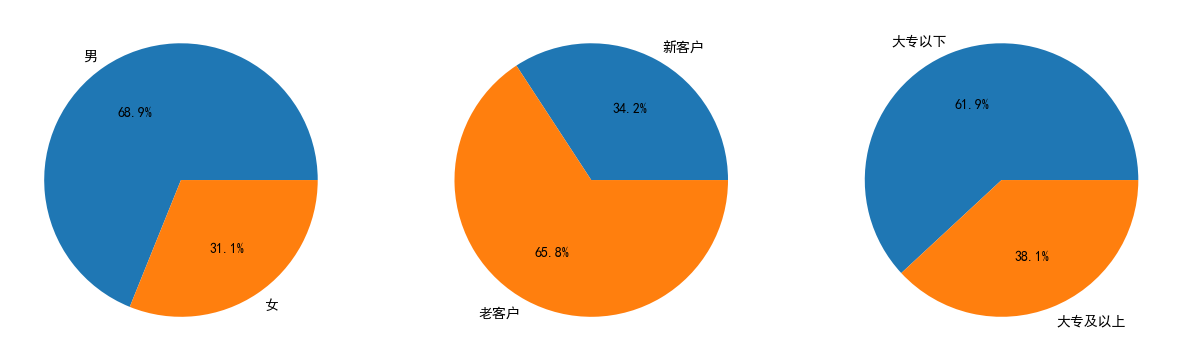

In [9]:
## ------------ 第一个图 ------------
sex_idx = ('男', '女')
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.pie(sex_data, labels=sex_idx, autopct='%.1f%%')

## ------------ 第二个图 ------------
#新老客户分析
new = LC[LC['是否首标'] == '是']
old = LC[LC['是否首标'] == '否']
newold_data = (new['借款金额'].sum(), old['借款金额'].sum())
newold_idx = ('新客户', '老客户')
plt.subplot(1,3,2)
plt.pie(newold_data, labels=newold_idx, autopct='%.1f%%')

## ------------ 第三个图 ------------
#学历分析
ungraduate = LC[LC['学历认证'] == '未成功认证']
graduate   = LC[LC['学历认证'] == '成功认证']
education_data = (ungraduate['借款金额'].sum(), graduate['借款金额'].sum())
education_idx = ('大专以下', '大专及以上')
plt.subplot(1,3,3)
plt.pie(education_data, labels=education_idx, autopct='%.1f%%')
plt.show()

#### 为了在图片上显示中文，需要先加载Alibaba-PuHuiTi-Medium字体

In [22]:
!wget http://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/Python/miniproject/01_draw_moon_cake/Alibaba-PuHuiTi-Medium.ttf

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [24]:
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"Alibaba-PuHuiTi-Medium.ttf", size=12) ##可以自由下载字体使用
matplotlib.rcParams['font.sans-serif'] = ['Alibaba-PuHuiTi-Medium']

![xcYfOR](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/xcYfOR.png)

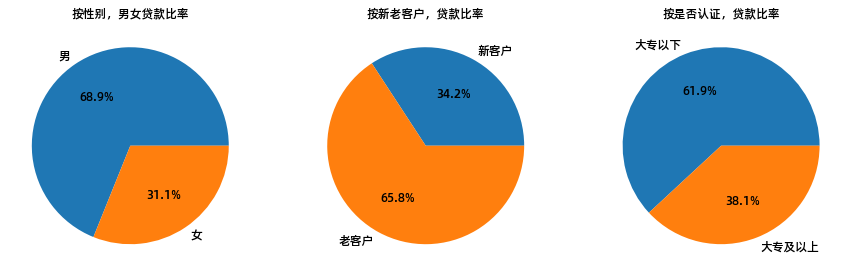

In [19]:
## ------------ 第一个图 ------------
sex_idx = ('男', '女')
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.title('按性别，男女贷款比率',fontproperties=font_set)
patches, texts, autotexts = plt.pie(sex_data, labels=sex_idx, autopct='%.1f%%')
plt.setp(autotexts, fontproperties=font_set)
plt.setp(texts, fontproperties=font_set)


## ------------ 第二个图 ------------
#新老客户分析
new = LC[LC['是否首标'] == '是']
old = LC[LC['是否首标'] == '否']
newold_data = (new['借款金额'].sum(), old['借款金额'].sum())
newold_idx = ('新客户', '老客户')
plt.subplot(1,3,2)
plt.title('按新老客户，贷款比率',fontproperties=font_set)
patches, texts, autotexts = plt.pie(newold_data, labels=newold_idx, autopct='%.1f%%')
plt.setp(autotexts, fontproperties=font_set)
plt.setp(texts, fontproperties=font_set)
## ------------ 第三个图 ------------
#学历分析
ungraduate = LC[LC['学历认证'] == '未成功认证']
graduate   = LC[LC['学历认证'] == '成功认证']
education_data = (ungraduate['借款金额'].sum(), graduate['借款金额'].sum())
education_idx = ('大专以下', '大专及以上')
plt.subplot(1,3,3)
plt.title('按是否认证，贷款比率',fontproperties=font_set)
patches, texts, autotexts = plt.pie(education_data, labels=education_idx, autopct='%.1f%%')
plt.setp(autotexts, fontproperties=font_set)
plt.setp(texts, fontproperties=font_set)
plt.show()

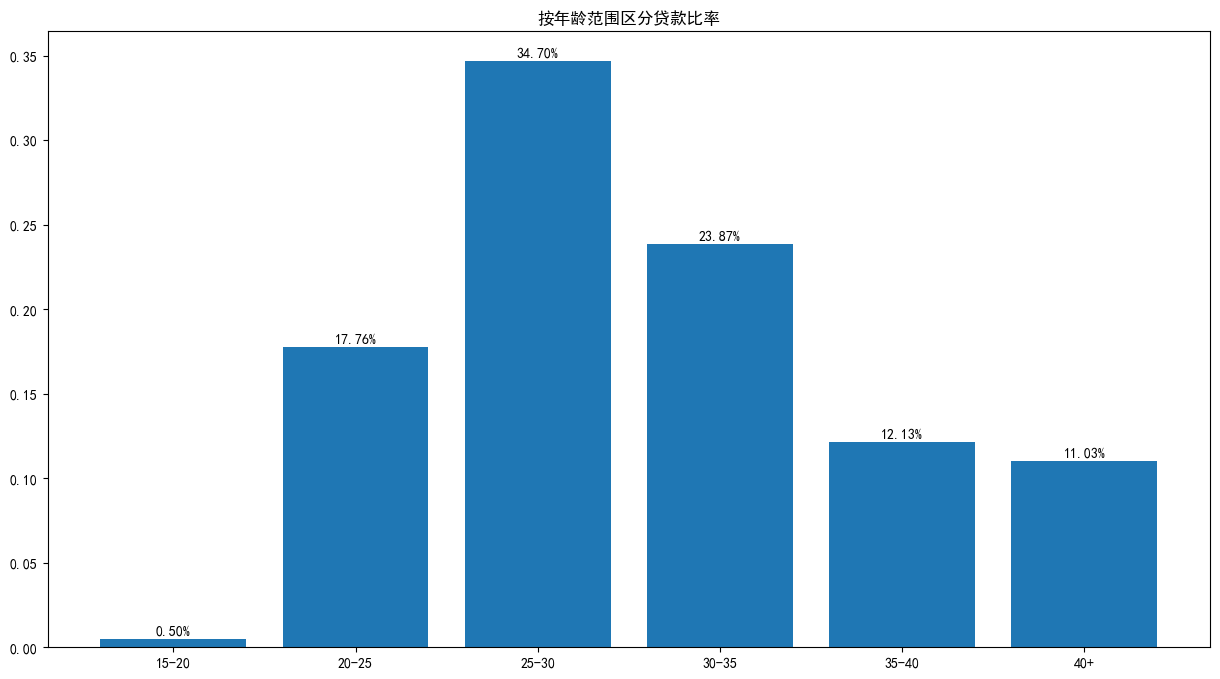

In [10]:
# 年龄分析

# 通过 布林 mask 来获取
ageA = LC.loc[(LC['年龄'] >= 15) & (LC['年龄'] < 20)]
ageB = LC.loc[(LC['年龄'] >= 20) & (LC['年龄'] < 25)]
ageC = LC.loc[(LC['年龄'] >= 25) & (LC['年龄'] < 30)]
ageD = LC.loc[(LC['年龄'] >= 30) & (LC['年龄'] < 35)]
ageE = LC.loc[(LC['年龄'] >= 35) & (LC['年龄'] < 40)]
ageF = LC.loc[LC['年龄'] >= 40]


age = (ageA, ageB, ageC, ageD, ageE, ageF)

age_total   = 0
age_percent =[]


for i in age:
    tmp = i['借款金额'].sum()
    age_percent.append(tmp)
    age_total  += tmp
    
    
age_percent /= age_total

age_idx = ['15-20', '20-25', '25-30', '30-35', '35-40', '40+']

plt.figure(figsize=(15, 8))
plt.title('按年龄范围区分贷款比率')#,fontproperties=font_set)
## 仔细想一下，为什么不需要 subplot
# 答：因为只有一张图
plt.bar(age_idx, age_percent)

for (a, b) in zip(age_idx, age_percent):
    plt.text(a, b+0.001, '%.2f%%' % (b * 100), ha='center', va='bottom', fontsize=10)
    
plt.show()

## **结论：**

1.男性客户的贡献的贷款金额占到了69%，可能的原因是男性更倾向于提前消费且贷款金额较大。

2.非首标的金额占比达到66%，说明用户倾向于多次使用，产品粘性较高。

3.大专以下学历的贷款金额更多，但是由于可能有很多用户并未认证学历，所以数据存在出入。

4.年龄段在25-30岁之间的借款金额最多，而20-35岁的人群占比超过75%，是该产品的主力消费人群。

### **2.分析资金储备**

每日的借款金额大概多少？波动有多大？公司每日需要准备多少资金可以保证不会出现资金短缺？

In [2]:
from datetime import datetime

# 分析每日贷款金额的走势
loan = LC[['借款成功日期', '借款金额']].copy()
loan['借款日期'] = pd.to_datetime(loan['借款成功日期'])
loan

,借款成功日期,借款金额,借款日期
0,2015-05-04,18000,2015-05-04
1,2015-03-16,9453,2015-03-16
2,2016-04-26,27000,2016-04-26
3,2015-03-30,25000,2015-03-30
4,2015-01-22,20000,2015-01-22
...,...,...,...
328548,2017-01-30,2389,2017-01-30
328549,2017-01-30,7000,2017-01-30
328550,2017-01-30,2017,2017-01-30
328551,2017-01-30,6406,2017-01-30


In [26]:
loan.info() # 这里主要是想输出一下，转完类型之后的显示

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   借款成功日期  328553 non-null  object        
 1   借款金额    328553 non-null  int64         
 2   借款日期    328553 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.5+ MB


In [12]:
loan1 = loan.pivot_table(index='借款日期', aggfunc='sum').copy()
loan1

,借款金额
借款日期,
2015-01-01,49473
2015-01-02,61273
2015-01-03,413384
2015-01-04,651165
2015-01-05,249614
...,...
2017-01-26,6119649
2017-01-27,2772905
2017-01-28,2103364


### 透视表pivot_table

透视表是一种可以对数据动态排布并且分类汇总的表格格式。或许大多数人都在Excel使用过数据透视表（如下图），也体会到它的强大功能，而在pandas中它被称作pivot_table。

![ZrNalA](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/ZrNalA.jpg)

### 为什么要使用pivot_table？

* 灵活性高，可以随意定制你的分析计算要求
* 脉络清晰易于理解数据
* 操作性强，报表神器

pivot_table有四个最重要的参数 **_index、values、columns、aggfunc_**，本文以这四个参数为中心讲解pivot操作是如何进行

#### Index

每个pivot_table必须拥有一个**_index_**

![o9PUkO](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/o9PUkO.png)

#### Values

通过上面的操作，我们获取了james harden在对阵对手时的**所有数据**，而Values可以对需要的计算数据进行筛选，如果我们只需要james harden在主客场和不同胜负情况下的得分、篮板与助攻三项数据

![GDZl9p](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/GDZl9p.png)

#### Aggfunc

aggfunc参数可以设置我们对数据聚合时进行的函数操作

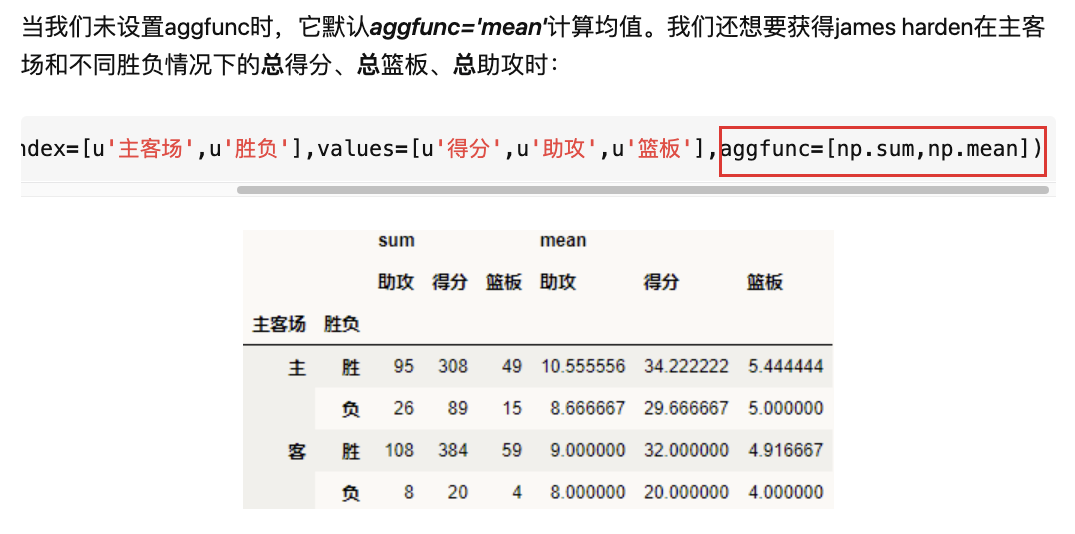

#### Columns 

Columns类似Index可以设置**列层次字段**，它不是一个必要参数，作为一种分割数据的可选方式

![ZJAeRg](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/ZJAeRg.png)

In [28]:
loan1 = loan.pivot_table(index='借款日期', aggfunc='sum').copy()
loan1

,借款金额
借款日期,
2015-01-01,49473
2015-01-02,61273
2015-01-03,413384
2015-01-04,651165
2015-01-05,249614
...,...
2017-01-26,6119649
2017-01-27,2772905
2017-01-28,2103364


In [3]:
loan['借款成功月份'] = [datetime.strftime(x, '%Y-%m') for x in loan['借款日期']]
loan

,借款成功日期,借款金额,借款日期,借款成功月份
0,2015-05-04,18000,2015-05-04,2015-05
1,2015-03-16,9453,2015-03-16,2015-03
2,2016-04-26,27000,2016-04-26,2016-04
3,2015-03-30,25000,2015-03-30,2015-03
4,2015-01-22,20000,2015-01-22,2015-01
...,...,...,...,...
328548,2017-01-30,2389,2017-01-30,2017-01
328549,2017-01-30,7000,2017-01-30,2017-01
328550,2017-01-30,2017,2017-01-30,2017-01
328551,2017-01-30,6406,2017-01-30,2017-01


In [14]:
loan2 = loan.pivot_table(index='借款成功月份', aggfunc='sum').copy()
loan2

,借款金额
借款成功月份,
2015-01,5495048
2015-02,2974525
2015-03,8678800
2015-04,8075770
2015-05,8430741
2015-06,10059413
2015-07,15423063
2015-08,23226904
2015-09,26546298


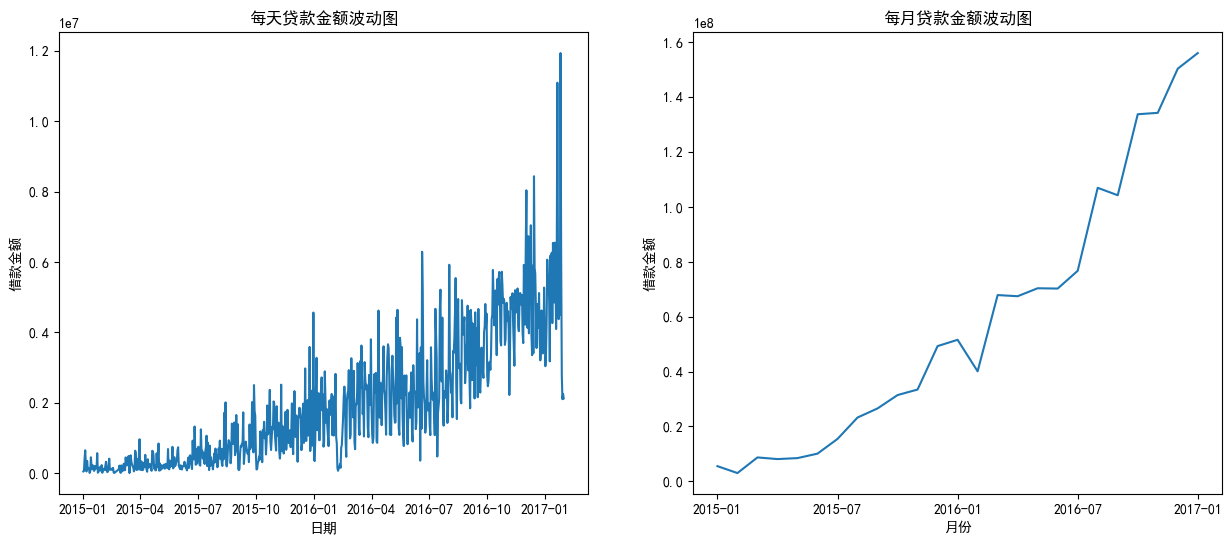

In [7]:
from datetime import datetime

# 分析每日贷款金额的走势
loan = LC[['借款成功日期', '借款金额']].copy()
loan['借款日期'] = pd.to_datetime(loan['借款成功日期'])
loan1 = loan.pivot_table(index='借款日期', aggfunc='sum').copy()
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title('每天贷款金额波动图')#,fontproperties=font_set)
### 透视图可以直接画 折线图，不需要额外拆成 值 和 索引
plt.plot(loan1)
plt.xlabel('日期')#,fontproperties=font_set)
plt.ylabel('借款金额')#,fontproperties=font_set)

# 分析每月贷款金额的走势
loan['借款成功月份'] = [datetime.strftime(x, '%Y-%m') for x in loan['借款日期']]
loan2 = loan.pivot_table(index='借款成功月份', aggfunc='sum').copy()
plt.subplot(1,2,2)
plt.title('每月贷款金额波动图')#,fontproperties=font_set)
plt.plot(loan2)
plt.xlabel('月份')#,fontproperties=font_set)
plt.xticks(['2015-01','2015-07','2016-01','2016-07','2017-01'])
plt.ylabel('借款金额')#,fontproperties=font_set)
plt.show()

In [28]:
loan1

,借款金额
借款日期,
2015-01-01,49473
2015-01-02,61273
2015-01-03,413384
2015-01-04,651165
2015-01-05,249614
...,...
2017-01-26,6119649
2017-01-27,2772905
2017-01-28,2103364


In [8]:
# 对2017年1月的数据继续进行分析，并求出平均值和标准差
loan3 = loan1.loc['2017-01']
avg = loan3['借款金额'].mean()
std = loan3['借款金额'].std()
print(avg, std)

5204663.8 2203394.1435809094


**结论：**

1. 每日贷款金额呈现的是一个往上的趋势,但是每天的波动较大。

2. 每月贷款分析结论：从2015年1月到2017年1月，月度贷款金额呈现上升趋势，上升速度随着时间增快。

3. 2017年1月每日的借款金额达到5204664元，标准差为2203394，根据3σ原则，想使每日借款金额充足的概率达到99.9%，则每日公式账上需准备5204664+2203394×3=11814846元。

### **3.分析逾期还款率（借款人的初始评级、借款类型、性别、年龄、借款金额等特征）**

逾期还款率 = 历史逾期还款期数/（历史逾期还款期数+历史正常还款期数）

In [9]:
LC['逾期还款率'] = LC['历史逾期还款期数']/(LC['历史逾期还款期数']+LC['历史正常还款期数'])*100
LC

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,逾期还款率
0,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16,21.917808
1,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,...,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1,7.142857
2,142421,27000,24,20.0,2016-04-26,E,普通,否,41,男,...,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3,10.714286
3,149711,25000,12,18.0,2015-03-30,C,其他,否,34,男,...,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1,2.380952
4,152141,20000,6,16.0,2015-01-22,C,电商,否,24,男,...,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14,10.606061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328548,32819271,2389,6,20.0,2017-01-30,C,其他,否,26,男,...,未成功认证,未成功认证,未成功认证,未成功认证,1,10000.0,7610.82,3,0,0.000000
328549,32819381,7000,12,20.0,2017-01-30,C,其他,否,22,男,...,未成功认证,未成功认证,未成功认证,未成功认证,1,2100.0,0.00,12,0,0.000000
328550,32819451,2017,6,20.0,2017-01-30,C,其他,否,36,女,...,成功认证,未成功认证,未成功认证,未成功认证,5,19656.0,10982.53,20,2,9.090909
328551,32819511,6406,12,20.0,2017-01-30,C,其他,否,33,男,...,未成功认证,未成功认证,未成功认证,未成功认证,1,3500.0,1593.59,7,0,0.000000


In [18]:
LC['初始评级'].value_counts() # 要尽量克服打开文件查看一共有多少种值的习惯

D    134860
C    131705
B     33188
E     17027
A     10284
F      1489
Name: 初始评级, dtype: int64

In [10]:
#初始评级的数据划分
level_idx = ('A','B','C','D','E','F')
lev = []
for i in level_idx:
    temp = LC[LC['初始评级'] == i]
    lev.append(temp)
# lev

In [36]:
LC['借款类型'].value_counts()

普通       118103
APP闪电    112079
其他        97302
电商         1069
Name: 借款类型, dtype: int64

In [11]:
    
#借款类型的数据划分
kind_idx = ('电商', 'APP闪电','普通', '其他')
kind = []
for i in kind_idx:
    temp = LC[LC['借款类型'] == i]
    kind.append(temp)
# kind

In [12]:
 
#不同借款金额的数据划分  
amount_idx = ('0-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+')


amountA = LC.loc[(LC['借款金额'] > 0) & (LC['借款金额'] < 2000)]
amountB = LC.loc[(LC['借款金额'] >= 2000) & (LC['借款金额'] < 3000)]
amountC = LC.loc[(LC['借款金额'] >= 3000) & (LC['借款金额'] < 4000)]
amountD = LC.loc[(LC['借款金额'] >= 4000) & (LC['借款金额'] < 5000)]
amountE = LC.loc[(LC['借款金额'] >= 5000) & (LC['借款金额'] < 6000)]
amountF = LC.loc[(LC['借款金额'] >= 6000)]
amount = (amountA, amountB, amountC, amountD,amountE,amountF)
# amount

In [13]:
# 逾期还款率的分析图
def depayplot(i,idx,data,xlabel,title,index):
    '''
    i       序号
    idx     分类的元组
    data    数据集
    xlabel  x 轴显示
    title   标题
    index   要获取的索引值
    '''
    depay = []                # 结果集
    
    for a in data:
        tmp = a[index].mean() # 均值
        depay.append(tmp)     # 结果集追加
        
    plt.subplot(2,3,i)
    plt.xticks(rotation='vertical')
    plt.bar(idx, depay)       # 柱状图

        
    for (a, b) in zip(idx, depay): 
        plt.text(a, b + 0.001, '%.2f%%'% b, ha='center', va='bottom')#, fontsize=10,fontproperties=font_set)
        
    plt.xlabel(xlabel)#,fontproperties=font_set)
    
    plt.ylabel(index)#,fontproperties=font_set)
    
    plt.title(title)#,fontproperties=font_set)

In [14]:
# 通过 布林 mask 来获取
ageA = LC.loc[(LC['年龄'] >= 15) & (LC['年龄'] < 20)]
ageB = LC.loc[(LC['年龄'] >= 20) & (LC['年龄'] < 25)]
ageC = LC.loc[(LC['年龄'] >= 25) & (LC['年龄'] < 30)]
ageD = LC.loc[(LC['年龄'] >= 30) & (LC['年龄'] < 35)]
ageE = LC.loc[(LC['年龄'] >= 35) & (LC['年龄'] < 40)]
ageF = LC.loc[LC['年龄'] >= 40]


age = (ageA, ageB, ageC, ageD, ageE, ageF)
age_idx = ['15-20', '20-25', '25-30', '30-35', '35-40', '40+']

In [15]:
sex_idx = ('男', '女')
sex = []
for i in sex_idx:
    temp = LC[LC['性别'] == i]
    sex.append(temp)

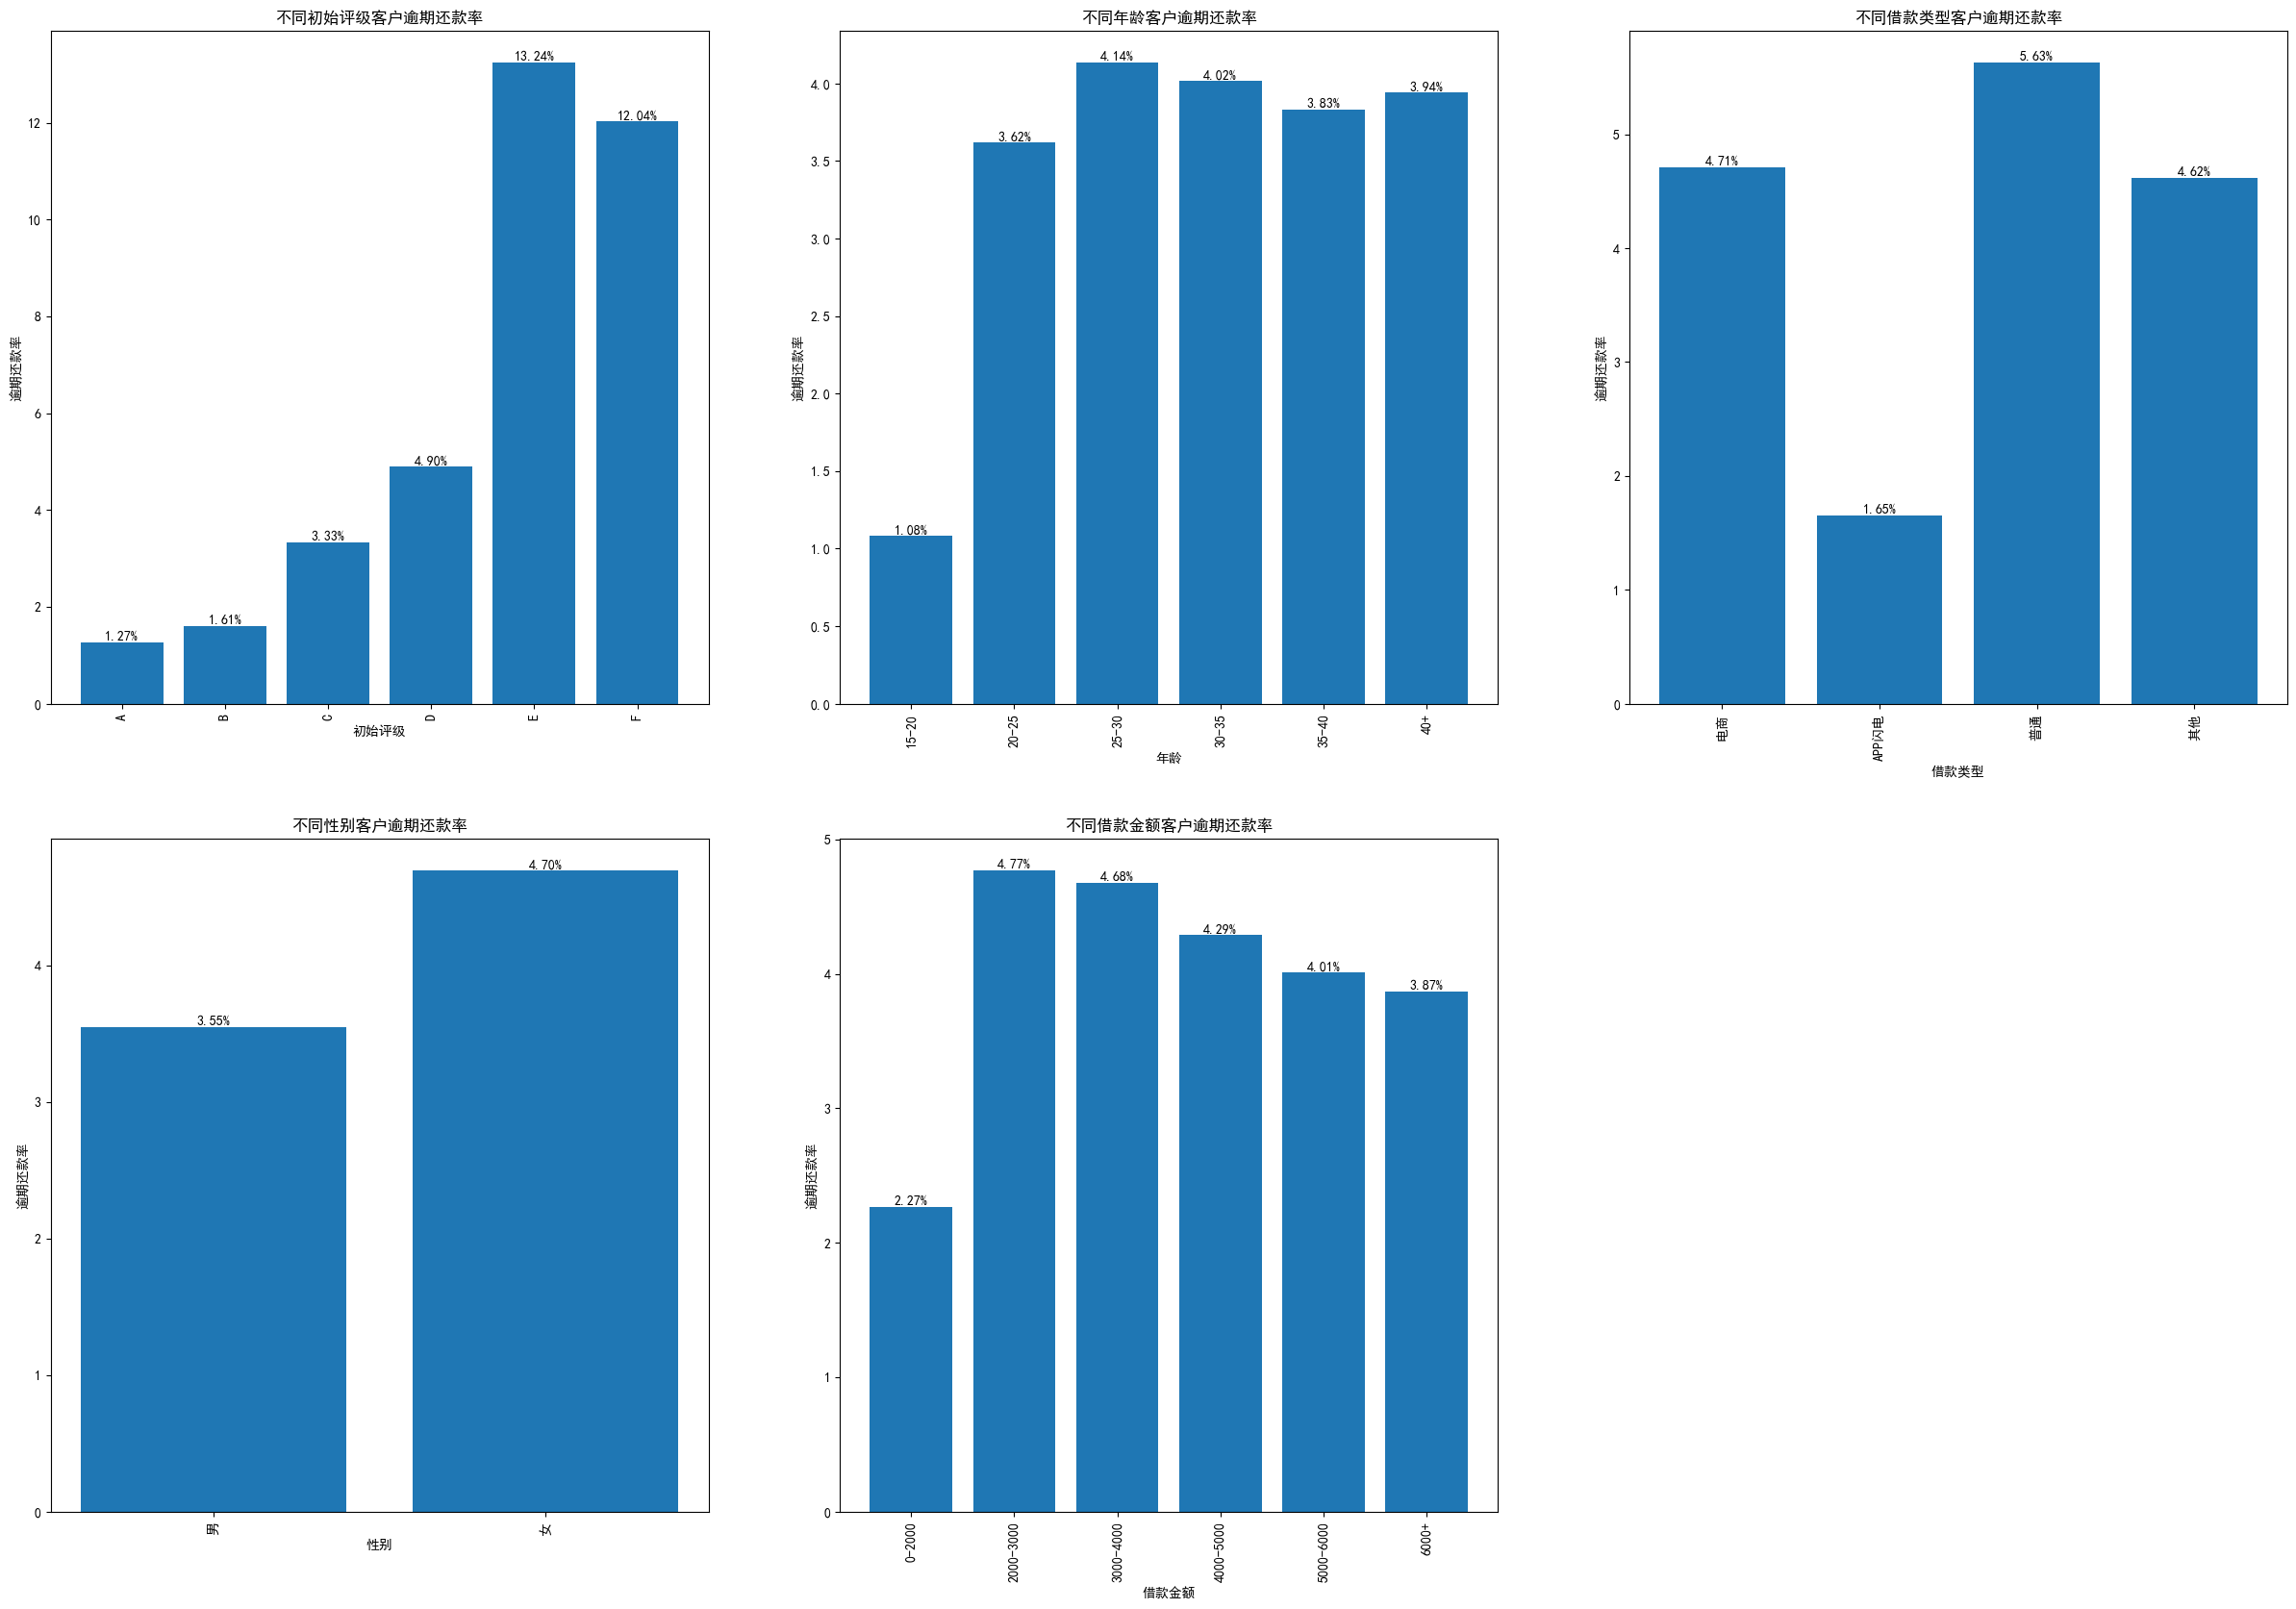

In [16]:
plt.figure(figsize=(30, 20))

index = '逾期还款率'

# 根据初始评级对逾期还款率进行分析
depayplot(1,level_idx,lev,'初始评级','不同初始评级客户逾期还款率',index)

# 根据年龄对逾期还款率进行分析
depayplot(2,age_idx,age,'年龄','不同年龄客户逾期还款率',index)

# 根据借款类型对逾期还款率进行分析
depayplot(3,kind_idx,kind,'借款类型','不同借款类型客户逾期还款率',index)

# 根据性别对逾期还款率进行分析
depayplot(4,sex_idx,sex,'性别','不同性别客户逾期还款率',index)

# 根据借款金额对逾期还款率进行分析
depayplot(5,amount_idx,amount,'借款金额','不同借款金额客户逾期还款率',index)

plt.show()

#### **结论：**

1. 初始评级对于贷款者的还款能力有比较好的预测作用，EF两级反转可能是因为样本数量较少，ABCD四个等级的平均逾期还款率都比较小，而EF两级明显增大，故公司对于这两类贷款者要谨慎对待。

2. 年龄对于逾期率的分布较为平均，25-30岁的年轻人可以重点关注。

3. APP闪电的逾期还款率明显低于其他三种，故公司可以多考虑与“APP闪电”借款类型的合作。

4. 女性的逾期率高于男性，可能是由于生活中男性收入较女性高造成的。

5. 借款金额在2000以下的逾期还款率最低，2000-3000之间的最高。可以多考虑小额贷款降低逾期风险。


### **4.分析借款利率（借款人的初始评级、借款类型、性别、年龄、借款金额等特征）**

哪些客户群体更愿意接受较高的借款利率？

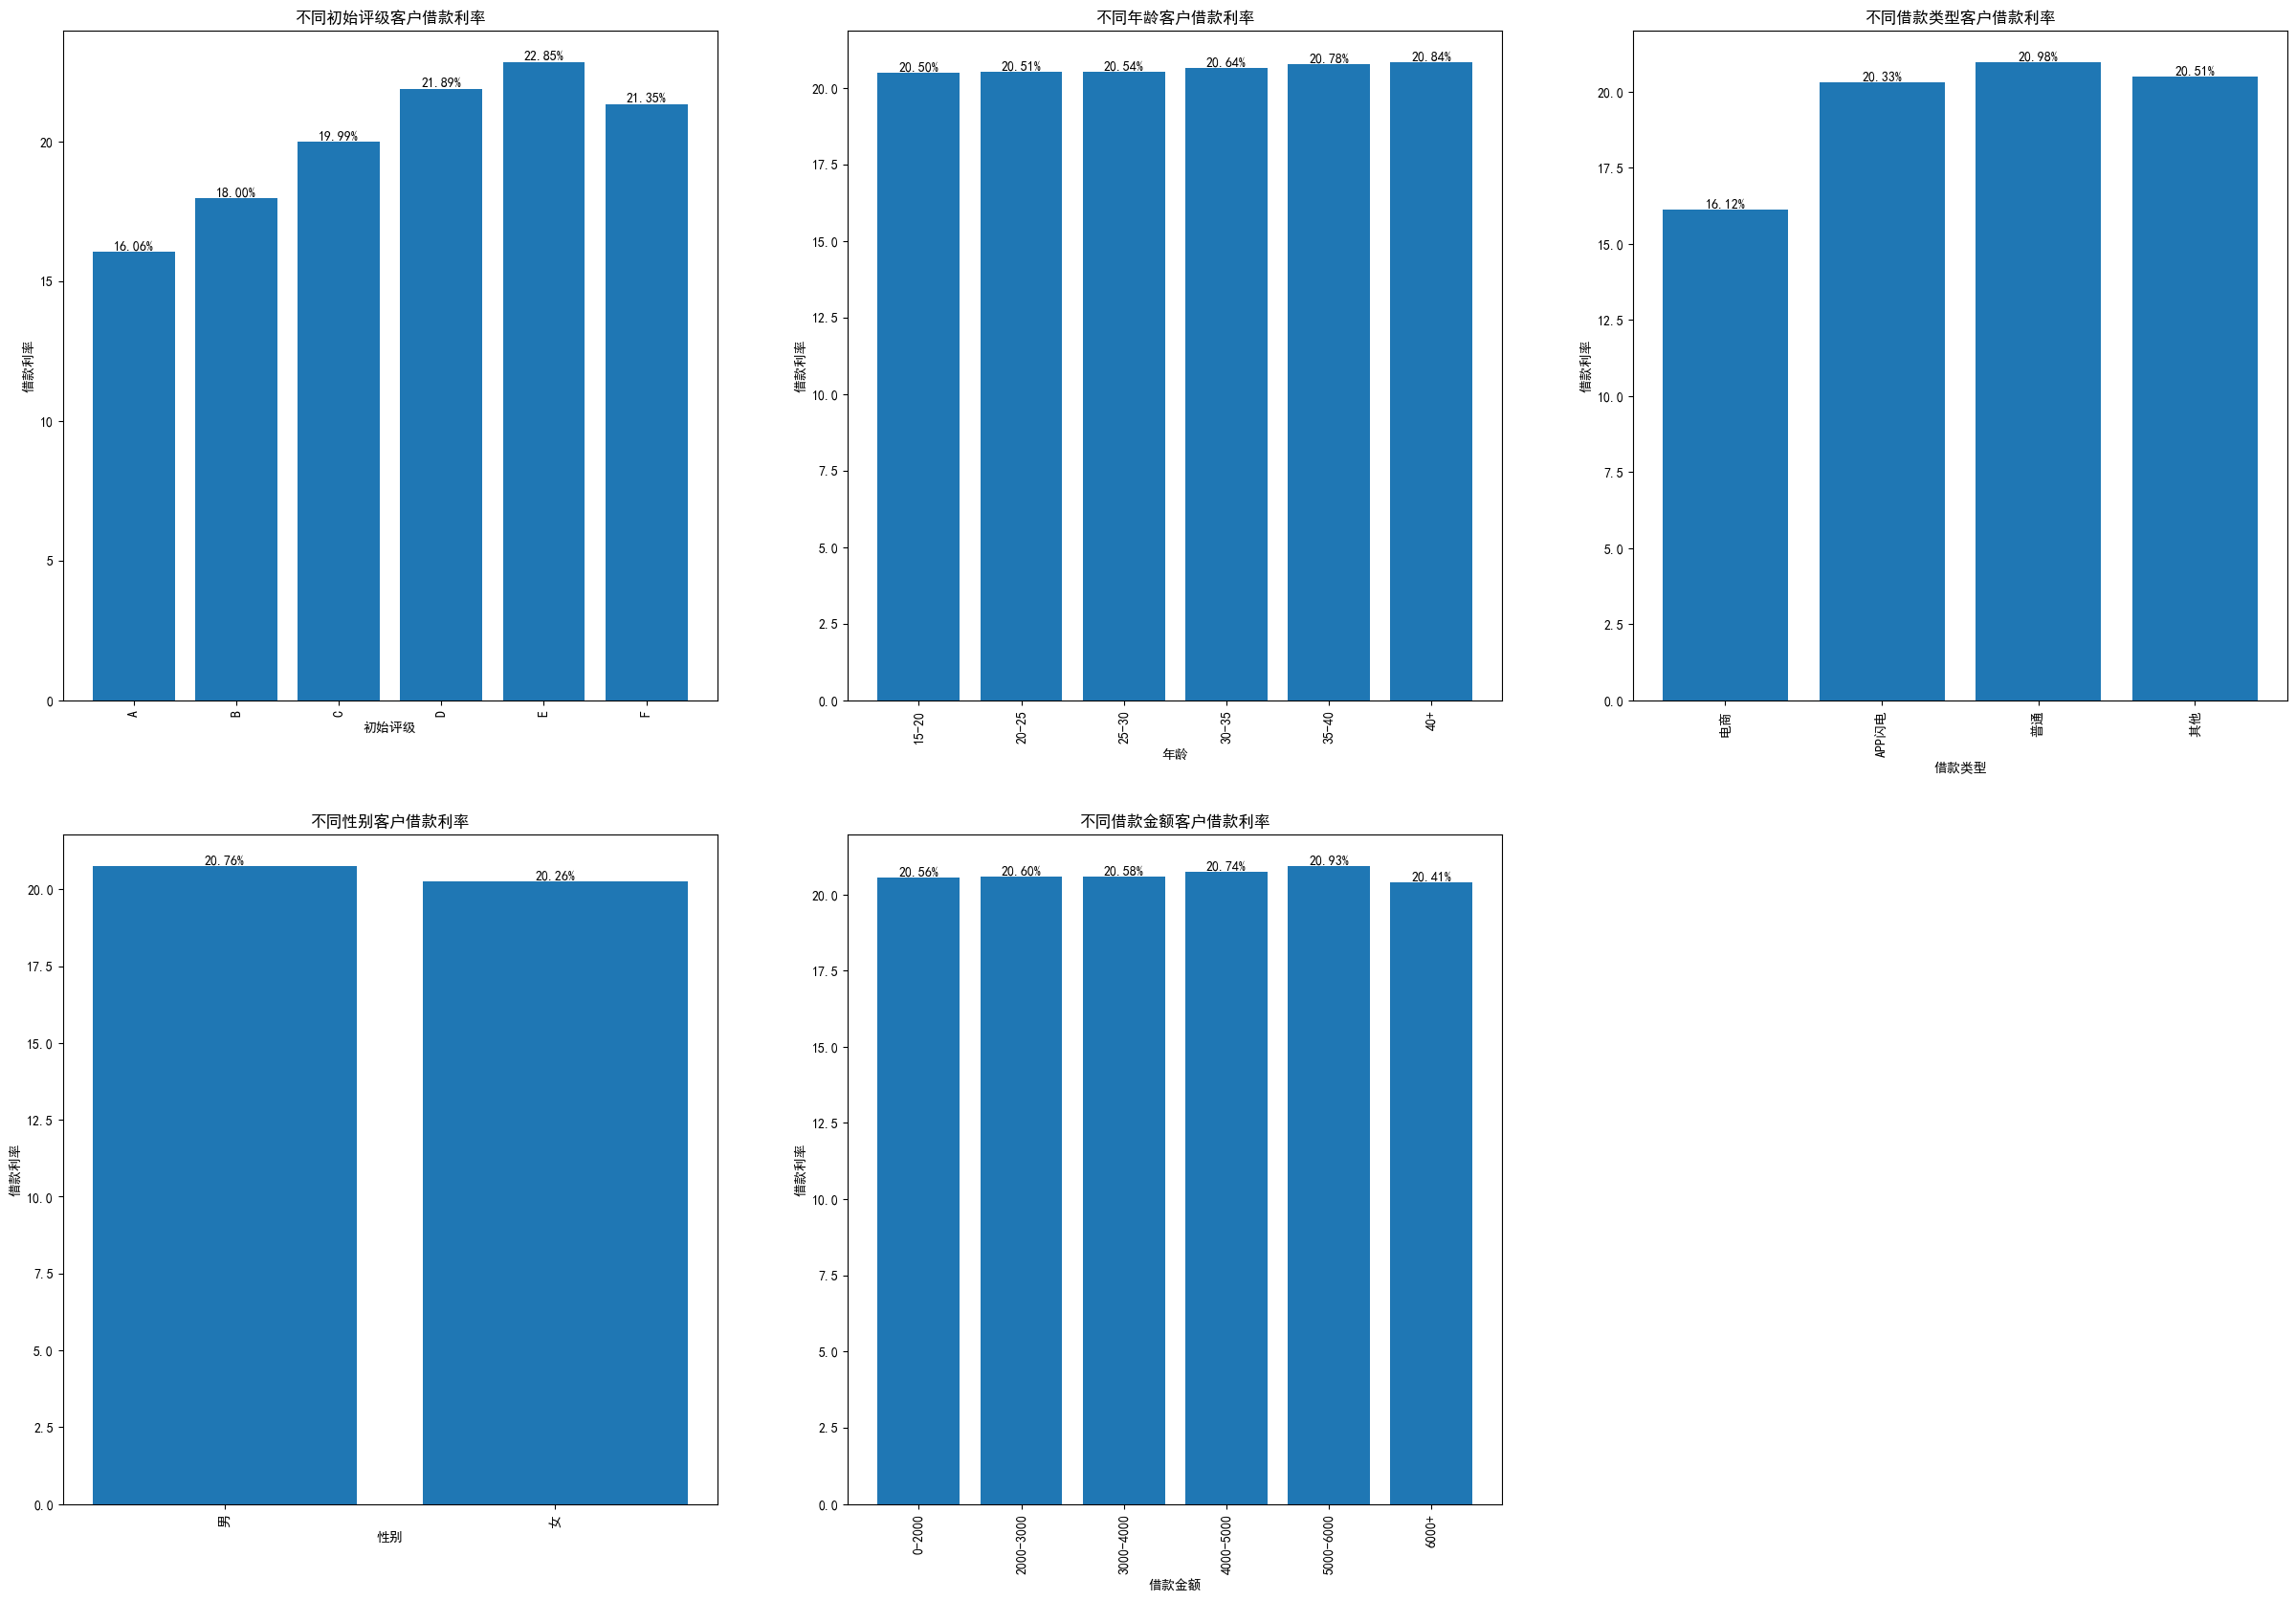

In [17]:
#借款利率的分析图
plt.figure(figsize=(30, 20))
index1 = '借款利率'

# 根据初始评级对借款利率进行分析
depayplot(1,level_idx,lev,'初始评级','不同初始评级客户借款利率',index1)

# 根据年龄对借款利率进行分析
depayplot(2,age_idx,age,'年龄','不同年龄客户借款利率',index1)

# 根据借款类型对借款利率进行分析
depayplot(3,kind_idx,kind,'借款类型','不同借款类型客户借款利率',index1)

# 根据性别对借款利率进行分析
depayplot(4,sex_idx,sex,'性别','不同性别客户借款利率',index1)

# 根据借款金额对借款利率进行分析
depayplot(5,amount_idx,amount,'借款金额','不同借款金额客户借款利率',index1)

plt.show()

#### **结论：**

1. 年龄对于借款利率的分布较为平均，差异性很小。

2. 初始评级的平均借款利率由小到大排列为ABCDFDE。

3. 电商的借款利率明显低于其他三种。

4. 女性所能接受的借款利率低于男性。

5. 借款金额对于借款利率的分布较为平均，差异性很小。


#### **对于以上四个问题综合分析LC数据集：**

1. “男性”、“回头客”、“中青年”是拍拍贷用户群体的主要特征。

2. 每日公司账上需准备7,283,728元，方可保证出现当日出借金额不足的可能性小于0.1%。

3. “初始评级”为D的群体，借款利率与E，F大致相当，但其逾期还款率却只有E，F群体的三分之一，相同的收益水平下风险大大降低，应多发展评级为D的客户或提高其贷款额度。

4. 通过“app闪电”贷款的逾期还款率远低于其他项，约为其他借款类型的三分之一至四分之一，而平均借款利率却和其他项相差不大，证明“app闪电”是该公司优质的合作方，其所引流来得客户质量很高，“拍拍贷”应与“app闪电”继续加深合作。

5. “电商”中的贷款客户，收益率水平明显较低，逾期率却不低，在该群体中的贷款收益小，风险大。

6. 从性别上看，男性群体贷款利率较高，逾期风险较小，相较女性一定程度上是更为优质的客户，但并不明显。

# 2.LCLP数据集分析用户的还款情况


基于LCLP 数据，分析用户的还款习惯（提前一次性全部还款 、部分提前还款以及逾期还款）的金额占比。

将数据集按借款金额分组，并按还款状态和还款日期分成四种还款情况并进行统计：

*（1）一次性全部还款：其还款状态标记为‘已提前还清该标全部欠款’；

*（2）部分提前还款：其还款状态标记为’已正常还款’，并且当期的还款日期早于到期日期；

*（3）正常还款：其还款状态标记为’已正常还款’，并且当期的还款日期即为到期日期；

*（4）逾期还款：还款状态标记为‘未还款’，‘已逾期还款’或者‘已部分还款’。


用百分堆积柱状图展示在不同年龄段（15-20 ，20-25 ，25-30 ， 30-35 ，35-40 ，40+ ）,

不同性别（ 男、女），不同初始评级（A-F），

不同借款类型、不同借款金额（1-1000，1000 -2000，2000-3000，3000+）、

不同期数（1-24）的走势。

![wqQnt0](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/wqQnt0.png)

In [18]:
# 删除尚未到期的记录
LP = LP[LP['到期日期'] <= LP['recorddate']]

In [19]:
LP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600898 entries, 0 to 3117188
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ListingId   1600898 non-null  int64  
 1   期数          1600898 non-null  int64  
 2   还款状态        1600898 non-null  int64  
 3   应还本金        1600898 non-null  float64
 4   应还利息        1600898 non-null  float64
 5   剩余本金        1600898 non-null  float64
 6   剩余利息        1600898 non-null  float64
 7   到期日期        1600898 non-null  object 
 8   还款日期        1600898 non-null  object 
 9   recorddate  1600898 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 134.4+ MB


In [47]:
LP.describe()

,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息
count,1.600898e+06,1.600898e+06,1.600898e+06,1.600898e+06,1.600898e+06,1.600898e+06,1.600898e+06
mean,1.418539e+07,4.114305e+00,1.144276e+00,5.436048e+02,5.496813e+01,1.428359e+01,1.342594e+00
std,7.002965e+06,2.845315e+00,4.858882e-01,2.844548e+03,1.109907e+02,2.162337e+02,1.230039e+01
min,1.265410e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.841501e+06,2.000000e+00,1.000000e+00,2.075500e+02,2.126000e+01,0.000000e+00,0.000000e+00
50%,1.282504e+07,3.000000e+00,1.000000e+00,3.562100e+02,4.230000e+01,0.000000e+00,0.000000e+00
75%,1.917361e+07,6.000000e+00,1.000000e+00,5.351400e+02,7.034000e+01,0.000000e+00,0.000000e+00
max,3.222780e+07,2.400000e+01,4.000000e+00,5.000000e+05,1.875000e+04,7.734837e+04,3.199990e+03


In [20]:
# 将LC和LP两个表融合起来
LCLP = pd.merge(LC, LP, how='left', on=['ListingId'])

In [21]:
# 删除数据不全的记录
LCLP = LCLP.dropna(how='any')

In [23]:
LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ListingId  328553 non-null  int64  
 1   借款金额       328553 non-null  int64  
 2   借款期限       328553 non-null  int64  
 3   借款利率       328553 non-null  float64
 4   借款成功日期     328553 non-null  object 
 5   初始评级       328553 non-null  object 
 6   借款类型       328553 non-null  object 
 7   是否首标       328553 non-null  object 
 8   年龄         328553 non-null  int64  
 9   性别         328553 non-null  object 
 10  手机认证       328553 non-null  object 
 11  户口认证       328553 non-null  object 
 12  视频认证       328553 non-null  object 
 13  学历认证       328553 non-null  object 
 14  征信认证       328553 non-null  object 
 15  淘宝认证       328553 non-null  object 
 16  历史成功借款次数   328553 non-null  int64  
 17  历史成功借款金额   328553 non-null  float64
 18  总待还本金      328553 non-null  float64
 19  历史正常还款期数   328553 non-n

In [22]:
LCLP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023959 entries, 0 to 1603587
Data columns (total 31 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ListingId   1023959 non-null  int64  
 1   借款金额        1023959 non-null  int64  
 2   借款期限        1023959 non-null  int64  
 3   借款利率        1023959 non-null  float64
 4   借款成功日期      1023959 non-null  object 
 5   初始评级        1023959 non-null  object 
 6   借款类型        1023959 non-null  object 
 7   是否首标        1023959 non-null  object 
 8   年龄          1023959 non-null  int64  
 9   性别          1023959 non-null  object 
 10  手机认证        1023959 non-null  object 
 11  户口认证        1023959 non-null  object 
 12  视频认证        1023959 non-null  object 
 13  学历认证        1023959 non-null  object 
 14  征信认证        1023959 non-null  object 
 15  淘宝认证        1023959 non-null  object 
 16  历史成功借款次数    1023959 non-null  int64  
 17  历史成功借款金额    1023959 non-null  float64
 18  总待还本金       1023959 no

In [51]:
LCLP.describe()

,ListingId,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,逾期还款率,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息
count,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06
mean,1.555568e+07,4.260340e+03,1.018629e+01,2.034064e+01,2.929710e+01,3.014310e+00,1.198434e+04,4.808516e+03,1.274921e+01,5.755729e-01,4.133961e+00,3.716038e+00,1.135856e+00,5.270704e+02,4.955353e+01,1.112097e+01,1.004733e+00
std,7.135938e+06,1.184931e+04,2.833507e+00,1.655421e+00,6.524736e+00,3.049200e+00,4.356321e+04,9.220797e+03,1.560610e+01,1.766335e+00,1.116971e+01,2.601770e+00,4.770325e-01,2.849558e+03,1.138766e+02,1.896729e+02,1.091655e+01
min,1.265410e+05,1.000000e+02,1.000000e+00,6.500000e+00,1.800000e+01,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,7.520000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.002527e+07,2.000000e+03,6.000000e+00,2.000000e+01,2.500000e+01,1.000000e+00,3.670000e+03,1.877720e+03,4.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.746400e+02,1.754000e+01,0.000000e+00,0.000000e+00
50%,1.511169e+07,3.041000e+03,1.200000e+01,2.000000e+01,2.800000e+01,2.000000e+00,7.000000e+03,3.734560e+03,8.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,2.969400e+02,3.600000e+01,0.000000e+00,0.000000e+00
75%,2.111501e+07,4.553000e+03,1.200000e+01,2.200000e+01,3.300000e+01,4.000000e+00,1.253700e+04,6.077980e+03,1.600000e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,4.981700e+02,5.855000e+01,0.000000e+00,0.000000e+00
max,3.222780e+07,5.000000e+05,2.400000e+01,2.400000e+01,5.600000e+01,6.490000e+02,7.405926e+06,1.172653e+06,2.507000e+03,6.000000e+01,1.000000e+02,2.300000e+01,4.000000e+00,5.000000e+05,1.750000e+04,6.531642e+04,3.199990e+03


In [26]:
# 定义用户还款习惯分析可视化函数
def repayhabit(group,num,idx,xlabel,color):
    # 一次性全部还款
    onetime = []
    for a in group:
        ot = a.loc[a['还款状态'] == 3]['应还本金'].sum() + a.loc[a['还款状态'] == 3]['应还利息'].sum()
        onetime.append(ot)
    # 部分提前还款
    partial = []
    for a in group:
        pa = a.loc[(a['还款状态'] == 1) & (a['还款日期'] < a['到期日期'])]['应还本金'].sum() + a.loc[(a['还款状态'] == 1) & (a['还款日期'] < a['到期日期'])]['应还利息'].sum()
        partial.append(pa)
    # 逾期还款
    pastdue = []
    for a in group:
        pas = a.loc[(a['还款状态'] == 2) | (a['还款状态'] == 4)|(a['还款状态'] == 0)]['应还本金'].sum() + \
            a.loc[(a['还款状态'] == 2) | (a['还款状态'] == 4)|(a['还款状态'] == 0)]['应还利息'].sum()
        pastdue.append(pas)
    # 正常还款
    normal = []
    for a in group:
        nm = a.loc[(a['还款状态'] == 1) & (a['还款日期'] == a['到期日期'])]['应还本金'].sum() + a.loc[(a['还款状态'] == 1) & (a['还款日期'] == a['到期日期'])]['应还利息'].sum()
        normal.append(nm)
    
    tot = []
    for i in range(num):
        t = onetime[i]+partial[i]+pastdue[i]+normal[i]
        tot.append(t)

    print("需还款总数：")    
    print(tot)

    temp = []
    for i in range(num):
        tp = (100 * onetime[i] / tot[i], 100 * partial[i] / tot[i],
                100 * normal[i] / tot[i], 100 * pastdue[i] / tot[i])
        temp.append(tp)
        
    df = pd.DataFrame(temp)
    #print(df)
    df.index = idx # 设置索引
    # df.columns = ('提前一次性', '部分提前', '正常', '逾期')
    df.columns = ('OneTime', 'Partial', 'Normal', 'Due') # 设置列名
    print(df)

    df.plot(kind='bar', 
            colormap=color, 
            stacked=True) # 控制是否为堆叠图
    plt.ylabel('还款金额')#,fontproperties=font_set)
    plt.xlabel(xlabel)#,fontproperties=font_set)
    plt.legend(loc='best')
    plt.show()
    

需还款总数：
[28456834.85, 69903191.44000001, 99595369.9, 72161874.03, 51083566.29000001, 269236628.2506]
             OneTime    Partial     Normal        Due
0-2000     10.204426  60.954742  16.233811  12.607020
2000-3000  10.208217  54.959603  20.400835  14.431346
3000-4000  14.874141  50.961604  21.902815  12.261440
4000-5000  14.678874  50.698304  22.775784  11.847038
5000-6000  15.703463  50.299053  23.239861  10.757622
6000+      11.688029  39.376116  39.790049   9.145806


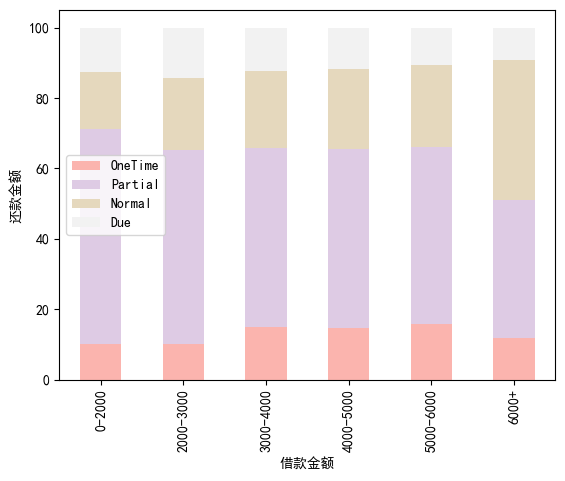

In [27]:
# 分析不同借款金额用户的还款情况
amountA = LCLP.loc[(LCLP['借款金额'] > 0) & (LCLP['借款金额'] < 2000)]
amountB = LCLP.loc[(LCLP['借款金额'] >= 2000) & (LCLP['借款金额'] < 3000)]
amountC = LCLP.loc[(LCLP['借款金额'] >= 3000) & (LCLP['借款金额'] < 4000)]
amountD = LCLP.loc[(LCLP['借款金额'] >= 4000) & (LCLP['借款金额'] < 5000)]
amountE = LCLP.loc[(LCLP['借款金额'] >= 5000) & (LCLP['借款金额'] < 6000)]
amountF = LCLP.loc[(LCLP['借款金额'] >= 6000)]
amountgroup = [amountA, amountB, amountC, amountD,amountE,amountF]

repayhabit(amountgroup,6,amount_idx,'借款金额','Pastel1') # https://matplotlib.org/stable/tutorials/colors/colormaps.html

**在根据借款金额分组中，得到结果如下：**

A组（0-2000）：总金额2.85千万。（1）一次性全部还款：占比 10.20%；（2）部分提前还款：占比60.95%；（3）正常还款：占比 16.23%； （4）逾期还款：占比 12.61%。

B组（2000-3000）：总金额 7千万。（1）一次性全部还款：占比 10.21%；（2）部分提前还款：占比54.96%；（3）正常还款：占比 20.40%； （4）逾期还款：占比 14.43%。

C组（3000-4000）：总金额 10千万。（1）一次性全部还款：占比 14.87%；（2）部分提前还款：占比50.96%；（3）正常还款：占比 21.90%； （4）逾期还款：占比 12.26%。

D组（4000-5000）：总金额 7.22千万。（1）一次性全部还：占比 14.68%；（2）部分提前还款：占比50.70%；（3）正常还款：占比 22.78%； （4）逾期还款：占比 11.85%。

E组（5000-6000）：总金额 5.11千万。（1）一次性全部还款：占比 15.70%；（2）部分提前还款：占比50.30%；（3）正常还款：占比 23.24%； （4）逾期还款：占比 10.76%。

F组（6000+）：总金额 26.92千万。（1）一次性全部还款：占比 11.69%；（2）部分提前还款：占比39.38%；（3）正常还款：占比 39.79%； （4）逾期还款：占比 9.15%。

**从对借款金额分组的统计结果以及上图结果中可以看出：**

（1）借款总额6000元以上最多，3000-4000其次，说明3000-4000元的借款金额是最多的。

（2）逾期风险在各金额组表现比较平均，其中2000-3000最大，6000+最小。

（3）随着标的金额增加，部分提前还款的总金额比例在减少，正常还款的总金额比例在增加。

需还款总数：
[1325708.5400000003, 85978811.91999999, 203407279.9106, 149443150.8962, 79947743.0043, 70334770.4895]
         OneTime    Partial     Normal        Due
15-20  10.441107  62.896452  13.114767  13.547674
20-25  13.428313  53.199581  20.048697  13.323409
25-30  14.002901  47.665900  26.687108  11.644091
30-35  12.363756  43.932650  33.824134   9.879460
35-40  10.805522  44.388718  34.672769  10.132990
40+    10.882495  42.854777  37.205296   9.057432


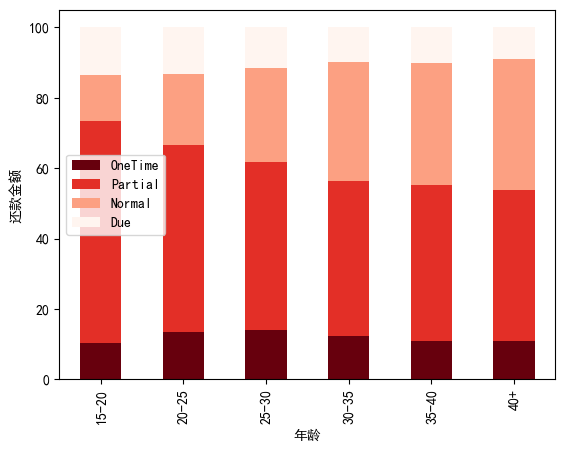

In [56]:
# 分析不同年龄段用户的还款情况
ageA = LCLP.loc[(LCLP['年龄'] >= 15) & (LCLP['年龄'] < 20)]
ageB = LCLP.loc[(LCLP['年龄'] >= 20) & (LCLP['年龄'] < 25)]
ageC = LCLP.loc[(LCLP['年龄'] >= 25) & (LCLP['年龄'] < 30)]
ageD = LCLP.loc[(LCLP['年龄'] >= 30) & (LCLP['年龄'] < 35)]
ageE = LCLP.loc[(LCLP['年龄'] >= 35) & (LCLP['年龄'] < 40)]
ageF = LCLP.loc[LCLP['年龄'] >= 40]
agegroup = [ageA, ageB, ageC, ageD, ageE, ageF]

repayhabit(agegroup,6,age_idx,'年龄','Reds_r')

**在年龄分组中，得到结果如下：**

A组（15-20岁）：总金额0.13千万。（1）一次性全部还款：占比 10.44%；（2）部分提前还款：占比62.90%；（3）正常还款：占比 13.11%； （4）逾期还款：占比 13.55%。

B组（20-25岁）：总金额 8.60千万。（1）一次性全部还款：占比 13.43%；（2）部分提前还款：占比53.2%；（3）正常还款：占比 20.05%； （4）逾期还款：占比 13.32%。

C组（25-30岁）：总金额 20.34千万。（1）一次性全部还款：占比 14.00%；（2）部分提前还款：占比47.67%；（3）正常还款：占比 26.69%； （4）逾期还款：占比 11.64%。

D组（30-35岁）：总金额 14.94千万。（1）一次性全部还款：占比 12.36%；（2）部分提前还款：占比43.92%；（3）正常还款：占比 33.82%； （4）逾期还款：占比 9.88%。

E组（35-40岁）：总金额 8.00千万。（1）一次性全部还款：占比 10.81%；（2）部分提前还款：占比44.39%；（3）正常还款：占比 34.67%； （4）逾期还款：占比 10.13%。

F组（40岁+）：总金额 7.03千万。（1）一次性全部还款：占比 10.88%；（2）部分提前还款：占比42.85%；（3）正常还款：占比 37.21%； （4）逾期还款：占比 9.06%。

**从对年龄分组的统计结果以及上图结果中可以看出：**

（1）拍拍贷的客户群体中25-30岁年龄组的贷款金额最高，15-20岁最低；

（2）各年龄组的还款习惯大体一致，从金额上来说，部分提前还款和正常还款是最常用的方式；

（3）逾期还款风险最高的年龄组为15-20岁组；

（4）25-30岁年龄组一次性提前还款的金额占比最高。

需还款总数：
[431899402.1953, 158538062.5653]
     OneTime    Partial     Normal        Due
男  13.159444  45.775236  30.093425  10.971895
女  11.417458  48.638828  29.114713  10.829001


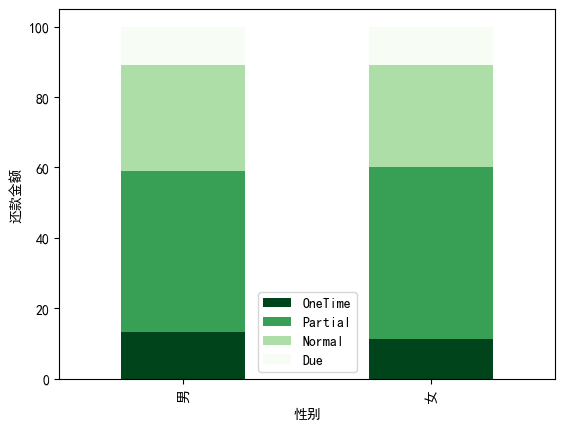

In [57]:
# 分析不同性别用户的还款情况
male = LCLP.loc[LCLP['性别'] == "男"]
female = LCLP.loc[LCLP['性别'] == "女"]
sexgroup = (male,female)

repayhabit(sexgroup,2,sex_idx,'性别','Greens_r')

**在男女性别组中，得到结果如下：**

男性：总还款金额 43.19千万。（1）一次性全部还款占比 13.16%；（2）部分提前还款占比45.78%；（3）正常还款占比 30.09%； （4）逾期还款占比10.97%。

女性：总还款金额 15.85千万。（1）一次性全部还款占比 11.42%；（2）部分提前还款占比48.64%；（3）正常还款占比29.11%； （4）逾期还款占比10.83%。

**从对男女性别组的统计结果以及上图结果中可以看出：**

（1）拍拍贷男性客户的贷款金额约为女性客户的2.7倍；

（2）男性及女性的还款习惯大体上比较一致，从金额上来说，部分提前还款>正常还款>一次性提前还款>逾期还款；

（3）男性客户一次性提前还款的金额占比较女性为高；

（4）女性逾期还款的风险略低于男性；

（5）女性部分提前还款的金额占比略大于男性。

需还款总数：
[24260113.047399998, 129789781.91, 292672443.2151, 131419854.39039999, 10771732.247699998, 1523539.95]
     OneTime    Partial     Normal        Due
A  10.951641  42.540019  39.727788   6.780552
B   7.686131  37.447042  47.651688   7.215139
C  14.192953  49.919494  24.995052  10.892502
D  14.592841  49.269359  21.846049  14.291750
E  13.213394  40.965391  22.906776  22.914440
F  10.752586  41.241621  20.679682  27.326111


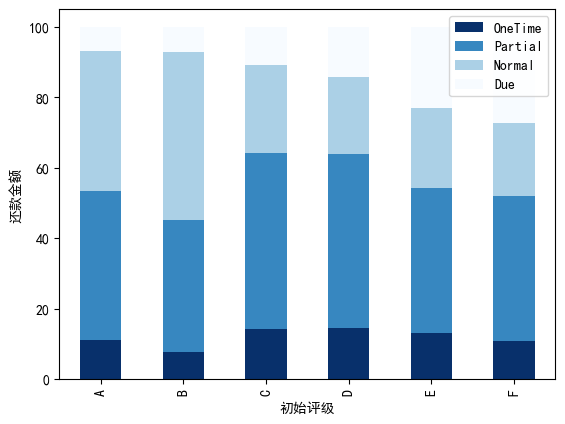

In [58]:
# 分析不同初始评级客户的还款情况
levelgroup = []
for i in level_idx:
    l = LCLP[(LCLP['初始评级'] == i)]
    levelgroup.append(l)
    
repayhabit(levelgroup,6,level_idx,'初始评级','Blues_r')

**在初始评级分组中，得到结果如下：**

A级：总金额2.43千万。（1）一次性全部还款：占比 10.95%；（2）部分提前还款：占比42.54%；（3）正常还款：占比 39.73%； （4）逾期还款：占比 6.78%。

B级：总金额 12.98千万。（1）一次性全部还款：占比 7.68%；（2）部分提前还款：占比37.45%；（3）正常还款：占比 47.65%； （4）逾期还款：占比 7.22%。

C级：总金额 29.27千万。（1）一次性全部还款：占比 14.19%；（2）部分提前还款：占比49.92%；（3）正常还款：占比 25.00%； （4）逾期还款：占比 10.89%。

D级：总金额 13.14千万。（1）一次性全部还款：占比 14.59%；（2）部分提前还款：占比49.27%；（3）正常还款：占比 21.85%； （4）逾期还款：占比 14.29%。

E级：总金额 1.08千万。（1）一次性全部还款：占比 13.21%；（2）部分提前还款：占比40.97%；（3）正常还款：占比 22.91%； （4）逾期还款：占比 22.91%。

F级：总金额 0.15千万。（1）一次性全部还款：占比 10.75%；（2）部分提前还款：占比41.24%；（3）正常还款：占比 20.68%； （4）逾期还款：占比 27.33%。

**从对初始评级分组的统计结果可以看出：**

（1）B级客户借款总额最多，占到了大约50%的金额。B、C、D级客户是借款的主力军。

（2）提前一次性还款的占比相对比较平均，其中D级最大为14.59%。

（3）逾期风险随着级别而呈总体增加趋势，F级客户的逾期占比达到了27.33%。

（4）部分提前和正常还款还是占到了大多数。

（5）总的来说，初始评级具有重要的参考意义。

需还款总数：
[85700890.47, 74452365.96, 234675993.36, 195608214.9706]
         OneTime    Partial     Normal        Due
电商      4.218635  26.927505  62.071671   6.782188
APP闪电   8.959958  61.125398  18.677700  11.236944
普通     17.162002  45.092948  26.095824  11.649226
其他     12.461221  51.329790  24.430785  11.778204


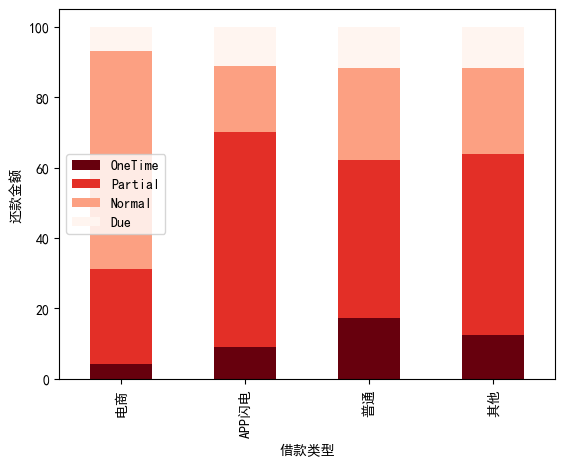

In [59]:
# 分析不同借款类型客户的还款情况
kindgroup = []
for i in kind_idx:
    l = LCLP[(LCLP['借款类型'] == i)]
    kindgroup.append(l)
    
repayhabit(kindgroup,4,kind_idx,'借款类型','Reds_r')

**在借款类型分组中，得到结果如下：**

电商：总金额8.57千万。（1）一次性全部还款：占比 4.22%；（2）部分提前还款：占比26.93%；（3）正常还款：占比 62.07%； （4）逾期还款：占比 6.78%。

APP闪电：总金额 7.45千万。（1）一次性全部还款：占比 8.96%；（2）部分提前还款：占比61.13%；（3）正常还款：占比 18.68%； （4）逾期还款：占比11.24%。

普通：总金额 23.47千万。（1）一次性全部还款：占比 17.16%；（2）部分提前还款：占比45.09%；（3）正常还款：占比 26.10%； （4）逾期还款：占比 11.65%。

其他：总金额 19.56千万。（1）一次性全部还款：占比 12.46%；（2）部分提前还款：占比51.33%；（3）正常还款：占比 24.43%； （4）逾期还款：占比 11.78%。

**从对借款类型分组的统计结果可以看出：**

（1）普通借款类型的借款金额总数最大，其次是其他，电商和APP闪电差不多。

（2）逾期风险电商最低，为6.78%。其他三种类型差不多。

（3）部分提前和正常还款还是占到了大多数。值得注意的是除了电商，其他三种类型的部分提前还款都占比很大。

需还款总数：
[135981578.1922, 108408463.47999999, 93715601.03, 75294688.9507, 60648276.0339, 47917912.09030001, 19092666.1202, 15699880.5325, 12331986.870000001, 9339947.0008, 6687098.62, 4416541.7700000005, 301461.70999999996, 169327.15999999997, 143667.96000000002, 83483.42, 69138.15, 50308.28, 36507.18, 19895.030000000002, 17235.37, 7340.29, 4459.52, 0.0]
      OneTime    Partial     Normal        Due
1   11.445900  47.586534  33.902811   7.064756
2   12.167250  50.653062  28.728319   8.451370
3   15.843928  46.505031  28.396910   9.254131
4   14.029461  44.266042  30.340452  11.364045
5   12.805724  44.175306  30.414081  12.604889
6    9.611442  44.158815  31.276022  14.953720
7   15.717427  44.974685  22.785384  16.522504
8   14.343482  44.269646  23.244959  18.141913
9   11.168077  44.718088  23.378983  20.734852
10  10.209341  44.175032  23.368664  22.246963
11   7.335732  43.147448  24.866896  24.649924
12   3.498742  46.299654  23.112021  27.089583
13  40.902773  19.437918  24.87080

C:\Users\86159\AppData\Local\Temp\ipykernel_22816\2569138141.py:35: RuntimeWarning: invalid value encountered in double_scalars
  tp = (100 * onetime[i] / tot[i], 100 * partial[i] / tot[i],
C:\Users\86159\AppData\Local\Temp\ipykernel_22816\2569138141.py:36: RuntimeWarning: invalid value encountered in double_scalars
  100 * normal[i] / tot[i], 100 * pastdue[i] / tot[i])


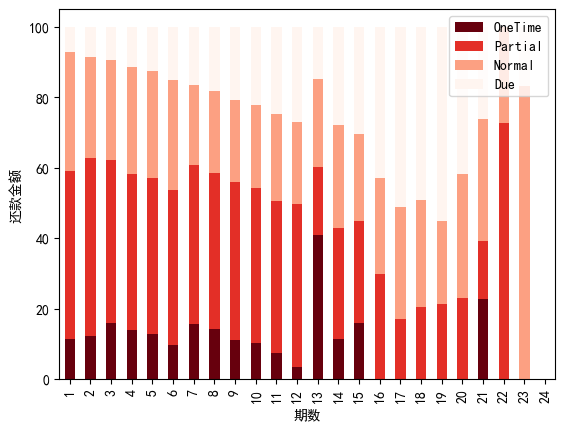

In [60]:
term_idx = ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24')
termgroup = []
for i in range(1,25):
    term = LCLP.loc[(LCLP['期数'] == i)]
    termgroup.append(term)

repayhabit(termgroup,24,term_idx,'期数','Reds_r')

**从对期数分组的统计结果可以看出：**

（1）借款金额是随着期数增加呈现出下降的趋势。

（2）不同的还款行为在不同的借款期限下的表现差异比较大，部分提前还款和正常还款是最常用的方式；

（3）逾期风险随着借款期限变长而呈总体增加趋势，期限为20个月的逾期金额占比为最高，达到了57.30%；

（4）期限为13个月的提前一次性还款占比最高，达到了16.77%。

（5）借款期限太长的样本数量太少，不能排除偶然性。

## 3. 计算金额催收回款率（催收回本金/所有逾期本金）

 在不同等级（A-F）、不同借款期数（1-24）和不同借款金额（0-2000，2000-3000，3000-4000，4000-5000，5000-6000，6000+）等，随逾期天数增加而呈现的走势。

1）x轴为逾期天数，y轴为金额催收回款率，不同参数对应不同曲线；

2）催收回款的定义为逾期90天之内的逾期还款。

In [28]:
from datetime import datetime,timedelta

LCLP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023959 entries, 0 to 1603587
Data columns (total 31 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ListingId   1023959 non-null  int64  
 1   借款金额        1023959 non-null  int64  
 2   借款期限        1023959 non-null  int64  
 3   借款利率        1023959 non-null  float64
 4   借款成功日期      1023959 non-null  object 
 5   初始评级        1023959 non-null  object 
 6   借款类型        1023959 non-null  object 
 7   是否首标        1023959 non-null  object 
 8   年龄          1023959 non-null  int64  
 9   性别          1023959 non-null  object 
 10  手机认证        1023959 non-null  object 
 11  户口认证        1023959 non-null  object 
 12  视频认证        1023959 non-null  object 
 13  学历认证        1023959 non-null  object 
 14  征信认证        1023959 non-null  object 
 15  淘宝认证        1023959 non-null  object 
 16  历史成功借款次数    1023959 non-null  int64  
 17  历史成功借款金额    1023959 non-null  float64
 18  总待还本金       1023959 no

In [29]:
LCLP['recorddate'] = pd.to_datetime(LCLP['recorddate'])
LCLP['到期日期']    = pd.to_datetime(LCLP['到期日期'])
LCLP['还款日期']    = pd.to_datetime(LCLP['还款日期'], errors='coerce') # https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
LCLP['lateday']    = LCLP['还款日期'] - LCLP['到期日期']

depay = LCLP[LCLP['lateday'] > timedelta(days=0)]
depay

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,recorddate,lateday
6,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,7.0,2.0,1509.21,141.02,0.0,0.0,2015-12-04,2015-12-05,2017-02-22,1 days
8,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,9.0,2.0,1554.82,95.41,0.0,0.0,2016-02-04,2016-02-05,2017-02-22,1 days
9,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,10.0,2.0,1578.15,72.08,0.0,0.0,2016-03-04,2016-03-06,2017-02-22,2 days
10,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,11.0,2.0,1601.82,48.41,0.0,0.0,2016-04-04,2016-04-05,2017-02-22,1 days
18,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,...,7.0,2.0,793.00,82.67,0.0,0.0,2015-10-16,2015-10-20,2017-02-22,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601529,32068721,2000,12,22.0,2017-01-21,C,其他,否,26,女,...,1.0,2.0,150.52,36.66,0.0,0.0,2017-02-21,2017-02-22,2017-02-22,1 days
1601731,32085691,2027,6,20.0,2017-01-21,C,其他,否,29,男,...,1.0,2.0,324.03,33.78,0.0,0.0,2017-02-21,2017-02-22,2017-02-22,1 days
1601869,32097701,2054,12,22.0,2017-01-21,D,其他,否,30,男,...,1.0,2.0,154.59,37.65,0.0,0.0,2017-02-21,2017-02-22,2017-02-22,1 days
1601918,32100941,5165,10,20.0,2017-01-22,C,其他,否,31,男,...,1.0,2.0,478.93,86.08,0.0,0.0,2017-02-21,2017-02-22,2017-02-22,1 days


In [32]:
depay[['初始评级','lateday','应还本金']].groupby(['初始评级','lateday']).sum()

应还本金
初始评级 lateday            
A    1 days    481394.94
     2 days    169925.78
     3 days    114232.70
     4 days    152740.99
     5 days     58711.10
...                  ...
F    146 days     320.78
     162 days     336.33
     294 days     288.12
     323 days     282.47
     395 days     267.31

[676 rows x 1 columns]

In [30]:
# 不同等级（A-F）随逾期天数催收还款率的走势
df  = depay.groupby(['初始评级','lateday'])['应还本金'].sum()
df

初始评级  lateday 
A     1 days      481394.94
      2 days      169925.78
      3 days      114232.70
      4 days      152740.99
      5 days       58711.10
                    ...    
F     146 days       320.78
      162 days       336.33
      294 days       288.12
      323 days       282.47
      395 days       267.31
Name: 应还本金, Length: 676, dtype: float64

In [31]:
df.to_frame()

应还本金
初始评级 lateday            
A    1 days    481394.94
     2 days    169925.78
     3 days    114232.70
     4 days    152740.99
     5 days     58711.10
...                  ...
F    146 days     320.78
     162 days     336.33
     294 days     288.12
     323 days     282.47
     395 days     267.31

[676 rows x 1 columns]

In [34]:
df1 = df.to_frame().pivot_table(index='lateday',columns = '初始评级', values ='应还本金')
tmp = df1.fillna(0)
tmp

初始评级,A,B,C,D,E,F
lateday,,,,,,
1 days,481394.94,3693587.83,8901135.93,4312939.33,458134.25,75502.43
2 days,169925.78,879114.14,3149262.22,1745577.77,219998.45,26841.63
3 days,114232.70,451497.20,1958277.85,1140704.78,144262.32,22531.30
4 days,152740.99,653828.34,3239558.84,1969485.11,281020.87,41713.98
5 days,58711.10,326382.48,1431778.04,845217.70,144467.02,17983.77
...,...,...,...,...,...,...
456 days,0.00,0.00,0.00,405.34,0.00,0.00
478 days,0.00,0.00,0.00,252.44,0.00,0.00
486 days,0.00,0.00,0.00,398.04,0.00,0.00


In [33]:
df2 = depay.groupby(['初始评级'])['应还本金'].sum()
df2

初始评级
A     1274289.91
B     7504133.61
C    23648391.45
D    12996416.61
E     1707266.88
F      268176.06
Name: 应还本金, dtype: float64

In [35]:
tmp_1 = tmp[tmp.index <= timedelta(days=90)]
tmp_1 = tmp_1/df2
tmp_1

初始评级,A,B,C,D,E,F
lateday,,,,,,
1 days,0.377775,0.492207,0.376395,0.331856,0.268344,0.281541
2 days,0.133349,0.117151,0.133170,0.134312,0.128860,0.100090
3 days,0.089644,0.060166,0.082808,0.087771,0.084499,0.084017
4 days,0.119864,0.087129,0.136989,0.151541,0.164603,0.155547
5 days,0.046074,0.043494,0.060544,0.065035,0.084619,0.067060
...,...,...,...,...,...,...
86 days,0.000000,0.000257,0.000054,0.000081,0.000000,0.000000
87 days,0.000088,0.000000,0.000042,0.000063,0.000024,0.000000
88 days,0.000308,0.000000,0.000134,0.000090,0.000000,0.000000


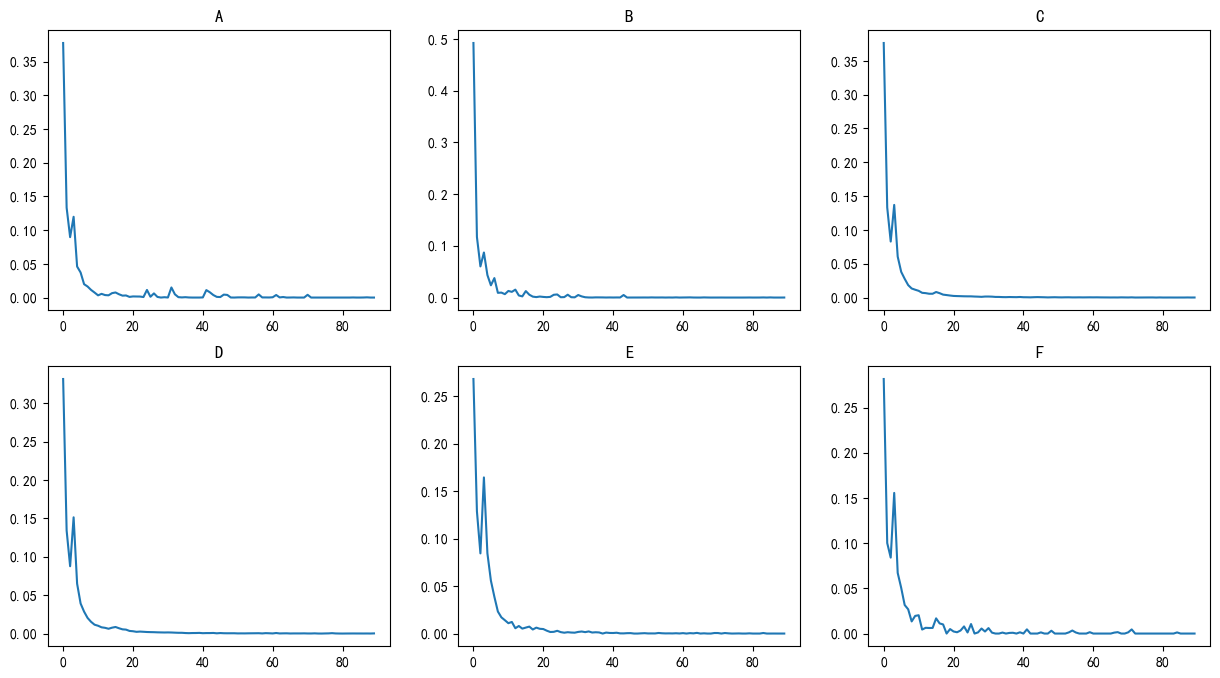

In [36]:
plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(range(90),tmp_1[level_idx[i]])
    plt.title(level_idx[i])
plt.show()

不同等级（A-F）随逾期天数催收还款率的走势大致相同，也就是大部分人都在逾期十天之内还款，说明他们有可能忘记还款；特别是在4、5天的还款的人数和金额最多。 

In [37]:
# 不同借款期数（1-24）随逾期天数催收还款率的走势

# 由于期数为24的项目不存在逾期还款的现象，所以只对1-23进行分析

df = depay.groupby(['期数','lateday'])['应还本金'].sum()
df

期数    lateday
1.0   1 days     3660368.91
      2 days     1080802.61
      3 days      610204.41
      4 days      961494.71
      5 days      370055.59
                    ...    
20.0  4 days         695.14
      20 days       1405.76
21.0  3 days        1646.32
      4 days         705.57
23.0  8 days         726.90
Name: 应还本金, Length: 1244, dtype: float64

In [40]:
df.to_frame().pivot_table(index='lateday',columns = '期数').fillna(0)

应还本金                                                  \
期数              1.0         2.0         3.0         4.0         5.0    
lateday                                                                
1 days    3660368.91  2958428.22  2608171.00  2401335.38  1931748.15   
2 days    1080802.61   934879.29   842212.06   801283.73   817909.48   
3 days     610204.41   565848.90   533054.10   538196.60   445046.75   
4 days     961494.71   892000.12   911898.34   833582.47   687065.25   
5 days     370055.59   415564.50   387071.85   404804.61   347359.69   
...              ...         ...         ...         ...         ...   
456 days        0.00        0.00        0.00      405.34        0.00   
478 days      252.44        0.00        0.00        0.00        0.00   
486 days        0.00        0.00      398.04        0.00        0.00   
495 days        0.00        0.00        0.00      824.57        0.00   
528 days        0.00        0.00        0.00        0.00        0.00   

                                                                  ...  \
期数              6.0        7.0        8.0        9.0        10.0  ...   
lateday                                                           ...   
1 days    1962128.82  619366.30  528544.84  468650.92  346068.79  ...   
2 days     611994.98  273080.65  244312.28  216185.86  154206.99  ...   
3 days     403887.21  188425.38  149444.52  136386.16  114154.39  ...   
4 days     675055.15  311807.46  291152.03  254383.91  208873.03  ...   
5 days     264379.29  147568.62  145999.73  120651.83   92408.10  ...   
...              ...        ...        ...        ...        ...  ...   
456 days        0.00       0.00       0.00       0.00       0.00  ...   
478 days        0.00       0.00       0.00       0.00       0.00  ...   
486 days        0.00       0.00       0.00       0.00       0.00  ...   
495 days        0.00       0.00       0.00       0.00       0.00  ...   
528 days     3311.40       0.00       0.00       0.00       0.00  ...   

                                                                         \
期数           13.0     14.0     15.0     16.0     17.0     18.0     19.0   
lateday                                                                   
1 days    2713.71  4873.96  2365.21   873.27  1783.67  1813.40  1826.31   
2 days    7703.44  8640.29     0.00  1746.53  6735.41     0.00     0.00   
3 days       0.00     0.00  2150.90  7759.75  1114.79     0.00   913.16   
4 days    2922.40  2968.32  1720.72  3315.02  2690.64  1360.05   684.87   
5 days    2295.63  3644.32  1509.96   654.95  1560.71  2727.62     0.00   
...           ...      ...      ...      ...      ...      ...      ...   
456 days     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
478 days     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
486 days     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
495 days     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
528 days     0.00     0.00     0.00     0.00     0.00     0.00     0.00   

                                
期数          20.0     21.0 23.0  
lateday                         
1 days      0.00     0.00  0.0  
2 days      0.00     0.00  0.0  
3 days      0.00  1646.32  0.0  
4 days    695.14   705.57  0.0  
5 days      0.00     0.00  0.0  
...          ...      ...  ...  
456 days    0.00     0.00  0.0  
478 days    0.00     0.00  0.0  
486 days    0.00     0.00  0.0  
495 days    0.00     0.00  0.0  
528 days    0.00     0.00  0.0  

[242 rows x 22 columns]

In [41]:
df1 = df.to_frame().pivot_table(index='lateday',columns = '期数', values ='应还本金')
tmp = df1.fillna(0)
tmp

期数,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0
lateday,,,,,,,,,,,,,,,,,,,,,
1 days,3660368.91,2958428.22,2608171.00,2401335.38,1931748.15,1962128.82,619366.30,528544.84,468650.92,346068.79,...,2713.71,4873.96,2365.21,873.27,1783.67,1813.40,1826.31,0.00,0.00,0.0
2 days,1080802.61,934879.29,842212.06,801283.73,817909.48,611994.98,273080.65,244312.28,216185.86,154206.99,...,7703.44,8640.29,0.00,1746.53,6735.41,0.00,0.00,0.00,0.00,0.0
3 days,610204.41,565848.90,533054.10,538196.60,445046.75,403887.21,188425.38,149444.52,136386.16,114154.39,...,0.00,0.00,2150.90,7759.75,1114.79,0.00,913.16,0.00,1646.32,0.0
4 days,961494.71,892000.12,911898.34,833582.47,687065.25,675055.15,311807.46,291152.03,254383.91,208873.03,...,2922.40,2968.32,1720.72,3315.02,2690.64,1360.05,684.87,695.14,705.57,0.0
5 days,370055.59,415564.50,387071.85,404804.61,347359.69,264379.29,147568.62,145999.73,120651.83,92408.10,...,2295.63,3644.32,1509.96,654.95,1560.71,2727.62,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456 days,0.00,0.00,0.00,405.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
478 days,252.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
486 days,0.00,0.00,398.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [42]:
df2 = depay.groupby(['期数'])['应还本金'].sum()
tmp_1 = tmp[tmp.index <= timedelta(days=90)]
tmp_1 = tmp_1/df2
tmp_1.dropna(how='all')
tmp_1

期数,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0
lateday,,,,,,,,,,,,,,,,,,,,,
1 days,0.464096,0.414119,0.393192,0.373579,0.348881,0.383050,0.298634,0.286309,0.285406,0.268113,...,0.124879,0.191653,0.094855,0.050770,0.096171,0.242580,0.275322,0.000000,0.000000,0.0
2 days,0.137034,0.130864,0.126967,0.124657,0.147717,0.119475,0.131669,0.132342,0.131656,0.119470,...,0.354497,0.339752,0.000000,0.101540,0.363157,0.000000,0.000000,0.000000,0.000000,0.0
3 days,0.077367,0.079207,0.080360,0.083728,0.080377,0.078848,0.090851,0.080953,0.083059,0.088440,...,0.000000,0.000000,0.086261,0.451136,0.060107,0.000000,0.137662,0.000000,0.699999,0.0
4 days,0.121907,0.124862,0.137472,0.129682,0.124086,0.131786,0.150341,0.157715,0.154919,0.161822,...,0.134483,0.116720,0.069009,0.192729,0.145073,0.181935,0.103246,0.330877,0.300001,0.0
5 days,0.046919,0.058170,0.058353,0.062976,0.062734,0.051613,0.071152,0.079087,0.073476,0.071592,...,0.105640,0.143301,0.060556,0.038077,0.084150,0.364876,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86 days,0.000000,0.000097,0.000000,0.000251,0.000029,0.000184,0.000152,0.000296,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
87 days,0.000000,0.000000,0.000000,0.000045,0.000149,0.000008,0.000000,0.000211,0.000253,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
88 days,0.000050,0.000078,0.000164,0.000180,0.000003,0.000139,0.000130,0.000285,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


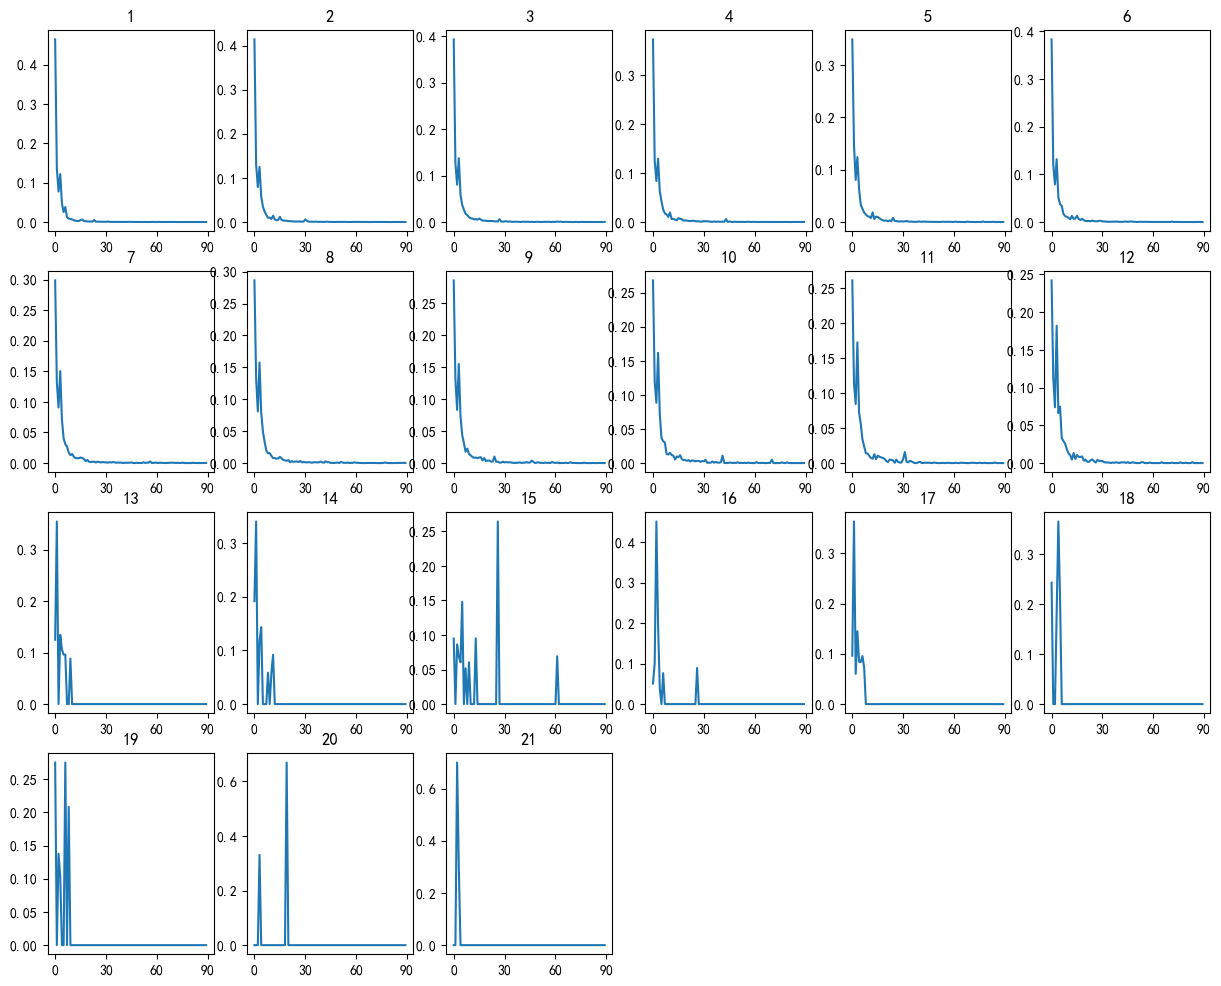

In [44]:
plt.figure(figsize=(15, 12))
for i in range(1,22): # 23期须单独显示，因为 22 期不存在，会报错
    plt.subplot(4,6,i)
    plt.plot(range(90),tmp_1[i])
    plt.xticks([0,30,60,90])
    plt.title(str(i))
plt.show()

不同借款期数（1-24）的金额收回款率随逾期天数的趋势没有明显的规律。在12期及之前大部分人都在逾期十天之内还款，特别是在4、5天的还款的人数和金额最多。 但是13之后呈现出10天之后回款率的依然很大。也有可能是因为数据量导致异常值凸显，但是也说明了借款期数长的回款率不够稳定。

In [47]:
depay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116364 entries, 6 to 1602162
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   ListingId   116364 non-null  int64          
 1   借款金额        116364 non-null  int64          
 2   借款期限        116364 non-null  int64          
 3   借款利率        116364 non-null  float64        
 4   借款成功日期      116364 non-null  object         
 5   初始评级        116364 non-null  object         
 6   借款类型        116364 non-null  object         
 7   是否首标        116364 non-null  object         
 8   年龄          116364 non-null  int64          
 9   性别          116364 non-null  object         
 10  手机认证        116364 non-null  object         
 11  户口认证        116364 non-null  object         
 12  视频认证        116364 non-null  object         
 13  学历认证        116364 non-null  object         
 14  征信认证        116364 non-null  object         
 15  淘宝认证        116364 non-null  obje

In [ ]:
# del df['column_name']
del depay['金额类型'] # 删除对应列，https://www.w3school.com.cn/python/ref_keyword_del.asp
depay

In [48]:
# 不同借款金额随逾期天数催收还款率的走势

def amount2StrRange(a):
    if a>0 and a<2000:
        return '0-2000'
    elif a>=2000 and a<3000:
        return '2000-3000'
    elif a>=3000 and a<4000:
        return '3000-4000'
    elif a>=4000 and a<5000:
        return '4000-5000'
    elif a>=5000 and a<6000:
        return '5000-6000'
    else:
        return '6000+'

In [49]:
depay['金额类型'] = depay.apply(lambda x:amount2StrRange(x['借款金额']),axis=1)

C:\Users\86159\AppData\Local\Temp\ipykernel_18312\580511259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depay['金额类型'] = depay.apply(lambda x:amount2StrRange(x['借款金额']),axis=1)


In [50]:
depay

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,recorddate,lateday,金额类型
6,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,2.0,1509.21,141.02,0.0,0.0,2015-12-04,2015-12-05,2017-02-22,1 days,6000+
8,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,2.0,1554.82,95.41,0.0,0.0,2016-02-04,2016-02-05,2017-02-22,1 days,6000+
9,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,2.0,1578.15,72.08,0.0,0.0,2016-03-04,2016-03-06,2017-02-22,2 days,6000+
10,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,2.0,1601.82,48.41,0.0,0.0,2016-04-04,2016-04-05,2017-02-22,1 days,6000+
18,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,...,2.0,793.00,82.67,0.0,0.0,2015-10-16,2015-10-20,2017-02-22,4 days,6000+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601529,32068721,2000,12,22.0,2017-01-21,C,其他,否,26,女,...,2.0,150.52,36.66,0.0,0.0,2017-02-21,2017-02-22,2017-02-22,1 days,2000-3000
1601731,32085691,2027,6,20.0,2017-01-21,C,其他,否,29,男,...,2.0,324.03,33.78,0.0,0.0,2017-02-21,2017-02-22,2017-02-22,1 days,2000-3000
1601869,32097701,2054,12,22.0,2017-01-21,D,其他,否,30,男,...,2.0,154.59,37.65,0.0,0.0,2017-02-21,2017-02-22,2017-02-22,1 days,2000-3000
1601918,32100941,5165,10,20.0,2017-01-22,C,其他,否,31,男,...,2.0,478.93,86.08,0.0,0.0,2017-02-21,2017-02-22,2017-02-22,1 days,5000-6000


In [51]:
df = depay.groupby(['金额类型','lateday'])['应还本金'].sum().copy()
df

金额类型    lateday 
0-2000  1 days      823618.24
        2 days      343152.69
        3 days      249495.98
        4 days      390346.13
        5 days      159345.48
                      ...    
6000+   394 days      1292.34
        424 days      1258.32
        426 days      1707.69
        495 days       824.57
        528 days      3311.40
Name: 应还本金, Length: 770, dtype: float64

In [52]:
df1 = df.to_frame().pivot_table(index='lateday',columns = '金额类型', values ='应还本金')
tmp = df1.fillna(0)
tmp

金额类型,0-2000,2000-3000,3000-4000,4000-5000,5000-6000,6000+
lateday,,,,,,
1 days,823618.24,2382648.44,3141425.93,2172883.99,1557539.30,7844578.81
2 days,343152.69,988253.48,1220662.13,811841.12,534287.32,2292523.25
3 days,249495.98,660578.23,785906.72,517279.91,352603.73,1265641.58
4 days,390346.13,1055755.26,1285106.62,941007.87,590304.46,2075827.79
5 days,159345.48,468391.09,552612.46,387347.07,251123.43,1005720.58
...,...,...,...,...,...,...
456 days,0.00,0.00,0.00,0.00,405.34,0.00
478 days,0.00,0.00,252.44,0.00,0.00,0.00
486 days,0.00,0.00,0.00,0.00,398.04,0.00


In [53]:
df2 = depay.groupby(['金额类型'])['应还本金'].sum()
df2

金额类型
0-2000        2601813.66
2000-3000     7157918.57
3000-4000     8865426.22
4000-5000     6152476.48
5000-6000     4083311.39
6000+        18537728.20
Name: 应还本金, dtype: float64

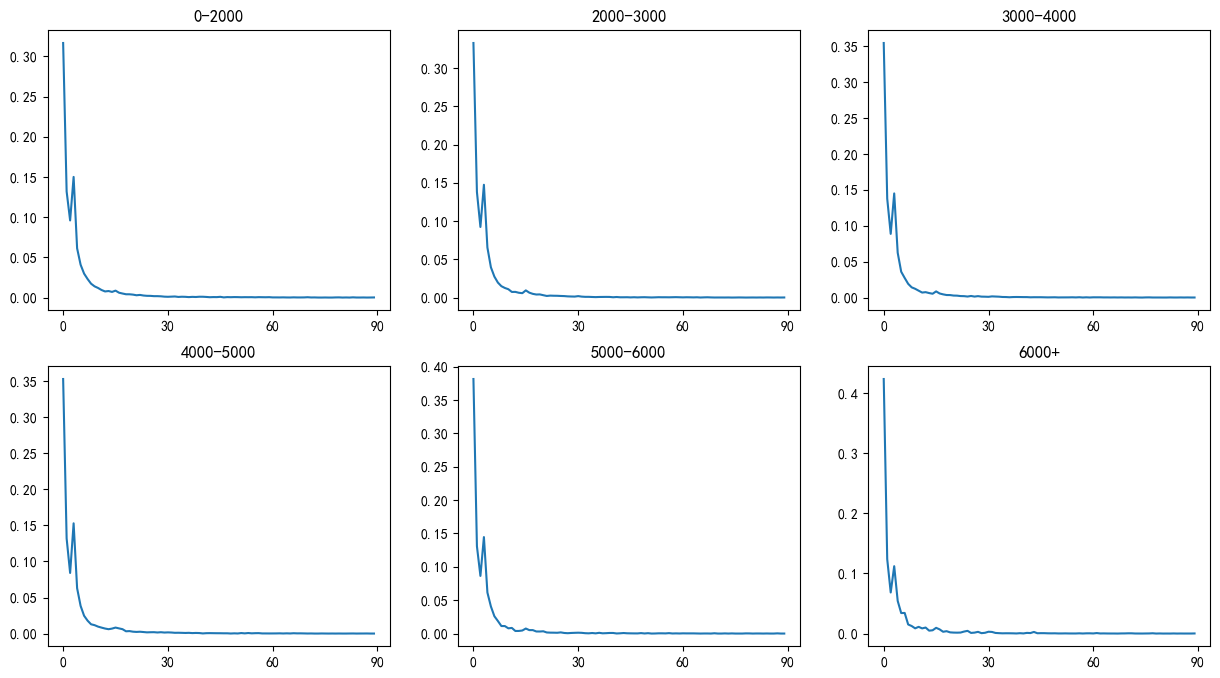

In [54]:
tmp_1 = tmp[tmp.index <= timedelta(days=90)]
tmp_1 = tmp_1/df2

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(range(90),tmp_1[amount_idx[i]])
    plt.xticks([0,30,60,90])
    plt.title(amount_idx[i])
plt.show()

 对不同借款金额对于进入催收回款率影响较大，借款金额越多，逾期的可能性就越大。

## 4. 累积收益曲线

![Xa81K0](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Xa81K0.png)

LCIS数据提供了该客户投资的从2015年1月1日起成交的所有标。包括投标记录和还款状况。请计算并画出该投资人从2016年9月开始到2017年2月，每月月底的累计收益曲线。 

In [55]:
from datetime import datetime,timedelta
LCIS = pd.read_csv('LCIS.csv')

In [56]:
# 计算从2016年9月至2017年2月所有的利息
def getinterest(df):
    
    df_1 = df[['ListingId','标当前状态','上次还款日期','上次还款利息']]
    
    df_1 = df_1[(df_1['标当前状态'] =='正常还款中') | (df_1['标当前状态'] =='已还清')]
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html
    df_1['上次还款日期'] = df_1['上次还款日期'].where(df_1['上次还款日期'].notnull(),'2016/08/31') # 替换不满足条件的值
    
    df_1['上次还款日期'] = pd.to_datetime(df_1['上次还款日期'], errors='coerce')
    
    df_1 = df_1[df_1['上次还款日期']>='2016-09-01'].drop_duplicates()
    
    df_1_1 = df_1.groupby(['上次还款日期'])['上次还款利息'].sum().to_frame().reset_index()
    
    return df_1_1

In [57]:
# 计算从2016年9月至2017年2月所有的亏损
def getloss(df):  

    df_2 = df[['ListingId', '待还本金', '标当前状态', '上次还款日期', '下次计划还款日期', 'recorddate']]

    df_2 = df_2[(df_2['标当前状态']=='逾期中')]

    df_2['下次计划还款日期'] = pd.to_datetime(df_2['下次计划还款日期'], errors='coerce')

    df_2['recorddate'] = pd.to_datetime(df_2['recorddate'], errors='coerce')
    
    # 往回看90天到2016-06-03
    df_2 = df_2[df_2['下次计划还款日期']>='2016-06-03']

    df_2['delay'] = df_2.apply(lambda x: (x['recorddate'] - x['下次计划还款日期']).days, axis = 1)

    df_2_1 = df_2[df_2['delay']>=90].sort_values(['ListingId','delay'])

    df_2_1['date'] = df_2['下次计划还款日期'] + timedelta(days=90)

    df_2_2 = df_2_1.loc[df_2_1.sort_values('recorddate').iloc[:,0].drop_duplicates().index]

    df_2_2 = df_2_2[['date','待还本金']].groupby(['date'])['待还本金'].sum().to_frame().reset_index()
    
    return df_2_2

In [58]:
# merge gain and loss
def profit(df):
    df_1_1 = getinterest(df)
    df_2_2 = getloss(df)
    df_now = pd.merge(df_1_1,df_2_2, how = 'left', left_on = '上次还款日期', right_on = 'date')    
    df_now['待还本金'] = df_now['待还本金'].where(df_now['待还本金'].notnull(),0)
    df_now['差别'] = df_now['上次还款利息'] - df_now['待还本金']
    return df_now

In [61]:
def draw(df):
    df_now = profit(df)
    plt.plot(df_now['上次还款日期'], np.cumsum(df_now['差别']), label="利息")
    plt.title('累积收益曲线')#,fontproperties=font_set)
    plt.xlabel('时间')#,fontproperties=font_set)
    plt.ylabel('收益金额')#,fontproperties=font_set)
    plt.show()

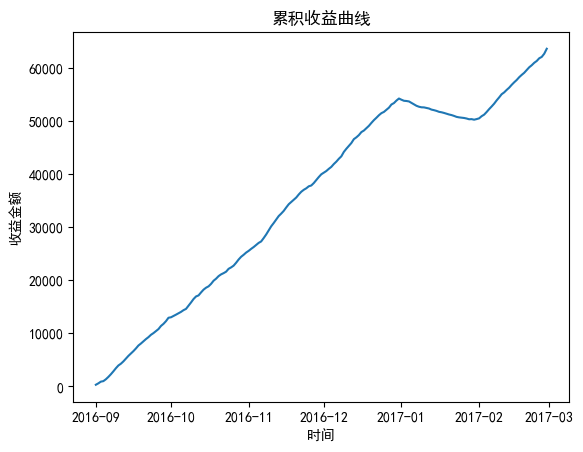

In [62]:
draw(LCIS)

调用draw()函数，可以对任一用户的数据画出累积收益曲线。